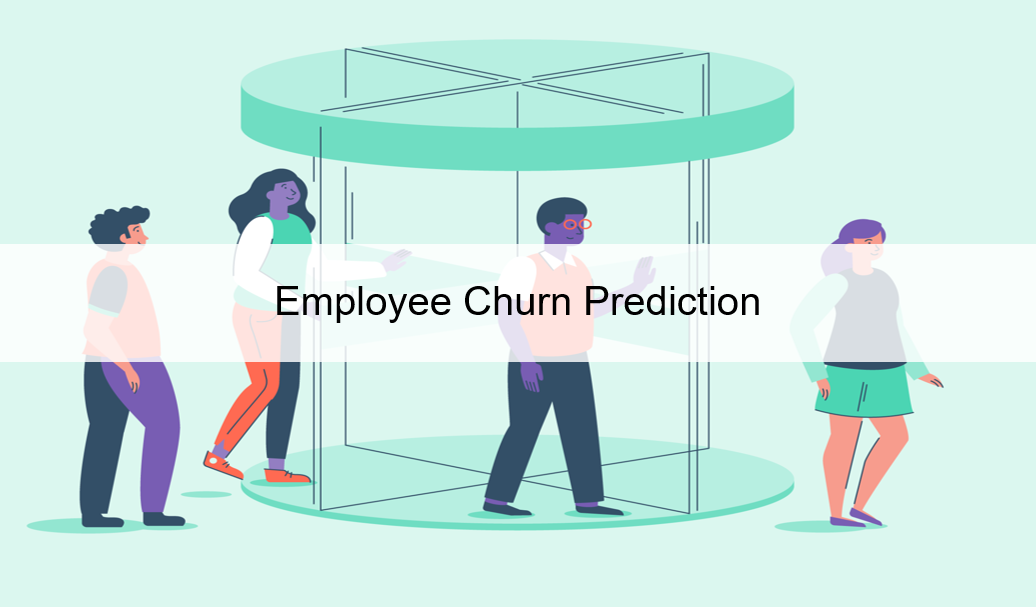

#### Data Goreng - Chen Bao Gang | Ng Boon Jane | Sam Tey | Soo Kar Lok | Yin Khar Shin 

## List of Content

* [Introduction](#Introduction)  
    * [Overview](#Overview)
    * [Research Questions](#Research-Questions)
    * [Research Objectives](#Research-Objectives)
    * [Significance](#Significance)
    * [Motivations](#Motivation)
    * [Related Work](#Related-Work)
* [Methodology](#Methodology)
    * [Dataset Description](#Dataset-Description)
    * [Data Pre-processing Methods](#Data-Pre-processing-Methods)
    * [Machine Learning Algorithms](#Machine-Learning-Algorithms)
* [Data Analysis](#Data-Analysis)
    * [Data Overview](#Data-Overview)
    * [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
* [Data Pre-processing](#Data-Pre-processing)
    * [Data Cleaning](#Data-Cleaning)
    * [Data Integration - Correlation](#Data-Integration---Correlation)
    * [Data Reduction - Principle Component Analysis (PCA)](#Data-Reduction---Principle-Component-Analysis-(PCA))
* [Modelling](#Modelling)
    * [Train Test Split](#Train-Test-Split)
    * [Model Building](#Model-Building)
    * [Model Evaluation](#Model-Evaluation)
    * [Feature Importance](#Feature-Importance)
* [Conclusion](#Conclusion)
* [Future Work](#Future-Work)
* [Reference](#Reference)


---

## Introduction

#### Overview 
Employee is an individual hired by a person or an organization as a part-timer of full-timer to work and complete a specific task, in exchange of wages or salary. According to the Statistics of Labour Force 2022, there is a continuous rise in employment rate compare to previous year, indicating employees are valuable assets to employer or an organization as they have major contribution in the organization’s profits and values (Department of Statistics Malaysia, 2022). However, employees will resign if employee matters are not handled properly. Employee resignation happened due to attrition (retirement, death or health issue), push factors (poor culture and management, overworked or underpay) or pull factors (better pay, more benefits or greater flexibility). Employee resignation is indeed a normal phenomenon but abnormal if resignation happens frequently and organizations will have no clue on what is happening and how to prevent. Prior research emphasises the employee churn is a challenging issue as employee plays an important role in driving the business performance and productivity. Employee resignation can cause negative impacts towards organizations in terms of cost, time and effort. Thus, it would be beneficial if action is taken prior to the employee resignation by accurately focusing on understanding and predicting the employee churn.


#### Research Questions 
- What is the relationship between the factors and employee churn? 

- Which factors most lead to the employee churn? 

- How do the factors help in employee recruitment and detect employee churn? 


#### Research Objectives 
- To determine the relationship between factors and employee churn. 

- To identify the significant factors that causes employee churn. 

- To predict the churner’s characteristics and probability to churn. 


#### Significance
- Benefits to organization's management team, hiring manager and human resource department. 

- Insighful information on the root causes of employee churn and leads towards a better understanding on what causing employee churn. 

- Provide an accuracy indicator to detect potential churner.

- Important guideline for retention effort by enhancing employee policy and improvising retention strategies to reduce employee’s dissatisfaction.

- Act as a tool to alter employee benefits when recruiting and screening on potential talents who is unlikely to resign within a short period of time.


#### Motivation 
Motivations to look into the employee relevant matters: 
1. The Great Resignation [Great Resignation](https://www.cnbc.com/video/2022/03/21/great-resignation-goes-global-and-shakes-up-labor-market-for-good.html#:~:text=The%20term%20Great%20Resignation%20was,economies%20are%20experiencing%20similar%20trends), also known as the Big Quit and the Great Reshuffle, is an ongoing economic trend in which employees have voluntarily resigned from their jobs, beginning in early 2021, primarily in the United States. It started to go global and continues to 2022 where other developed countries are experiencing the same issue, despite labour shortage and high umemployment. Possible causes include wage stagnation amid rising cost of living, long-lasting job dissatisfaction, and safety concerns of the COVID-19 pandemic [Great Resignation Survey](https://www.pewresearch.org/fact-tank/2022/03/09/majority-of-workers-who-quit-a-job-in-2021-cite-low-pay-no-opportunities-for-advancement-feeling-disrespected/#:~:text=The%20COVID%2D19%20pandemic%20set,20%2Dyear%20high%20last%20November). 


2. Frequent employee resignation is happenning among our workplace. 


#### Related Work
A comparison table of previous research studies on employee churn prediction which consists of methodology and contributing factor that causes employee atrition with author, title and published year. [Literature review](https://drive.google.com/file/d/13x8fZyY79CsjMEUS9Q7IqJaUNeiHdV0l/view?usp=sharing)

-----

## Methodology 

#### Dataset Description

- Retrieved from Kaggle [IBM Human Resource Data](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- A fictional data set created by IBM data scientists that contains a total of 1471 records with 34 independent variables and 1 dependent variable 

#### Data Analysis
- Univariate, Bivariate and Multivariate Analysis
- Visualization: Histogram, Boxplot, Barplot

#### Data Pre-processing Methods
- Data Cleaning: Drop and replace
- Data Integration: Correlation - check the relationship between variables
- Data Transformation: Label Encoding - convert the labels into a numeric form so as the machine-readable form. **Different from One-Hot Encoding, which is the process of creating dummy variables.
- Data Reduction: Principle Component Analysis (PCA)

#### Model Building
- Train test split 
- Machine Learning: Logistic Regression, Random Forest, Decision Tree 
- K fold cross validation

#### Model Evaluation 
- Accuracy, Confusion Matrix, Feature Importance

---

### Data Analysis
#### Data Overview

#### <a style="color:blue;">Import libraries</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

#### <a style="color:blue;">Import dataset and set 'EmployeeNumber' as index. 'EmployeeNumber' is removed as variable because it represents an employee identity.</a>

In [2]:
dataset = pd.read_csv('Dataset - IBM HR Employee Attrition.csv')
dataset = dataset.set_index(dataset['EmployeeNumber'])
dataset = dataset.drop(columns = 'EmployeeNumber')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert Attrition to numerical label - Yes indicates 1 and No indicates 0</a>

In [3]:
dataset['Attrition'] = dataset['Attrition'].replace(to_replace=['Yes', 'No'], value=[1, 0])
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


#### <a style="color:blue;">Dataset overview</a>
There are 1470 records (rows) and 34 attributes (columns). Dataset are mostly made up of numerical value (int64) and categorical value (object). Statistics are provided for numerical variables only. 

In [4]:
print ("Total rows & columns: " , dataset.shape, '\n') 
dataset.info()

Total rows & columns:  (1470, 34) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   

In [5]:
dataset.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### <a style="color:blue;">Exploratory Data Analysis (EDA)</a>

1. Attrition value 
- This is an imbalanced dataset. 

In [6]:
dataset['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

2. Declare Variables

In [7]:
#Target 
target = ['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical_val = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical_val = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
numerical_df = dataset[numerical_val]
categorical_df = dataset[categorical_val] #addin attrition value 
categorical_df.insert(0, 'Attrition', dataset['Attrition'])

3. Distribution Checking
- Numerical boxplot

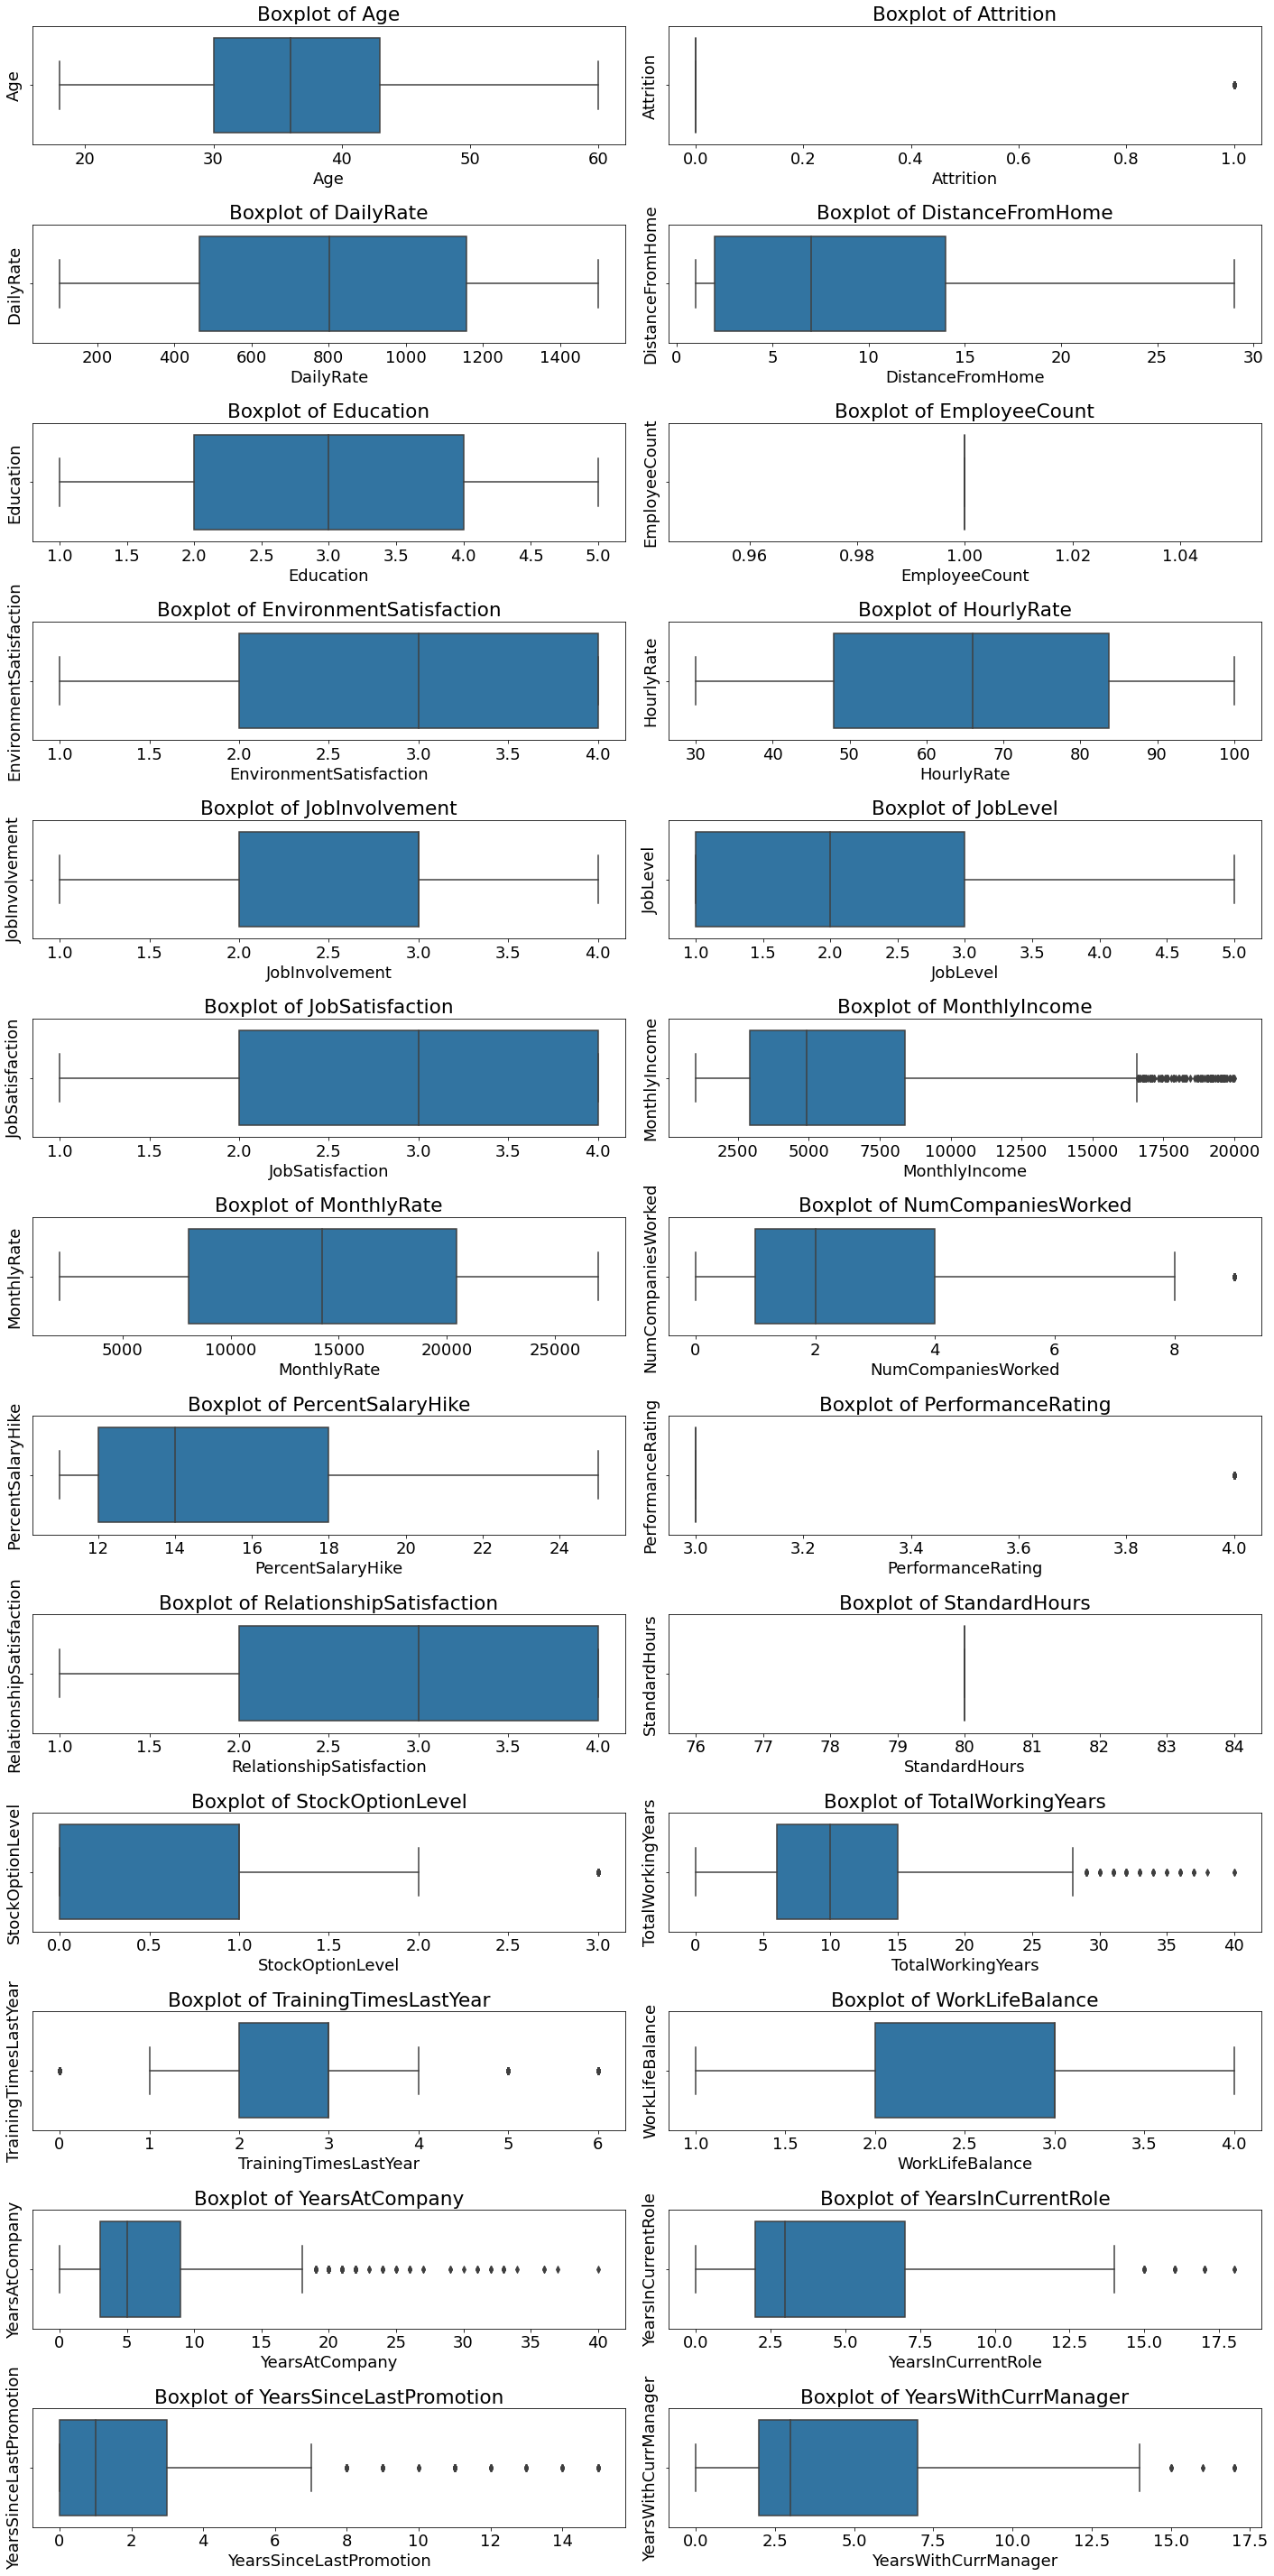

In [8]:
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel=k, ylabel=k)
        ax[i, j].set(title='Boxplot of '+k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

- Categorical histogram

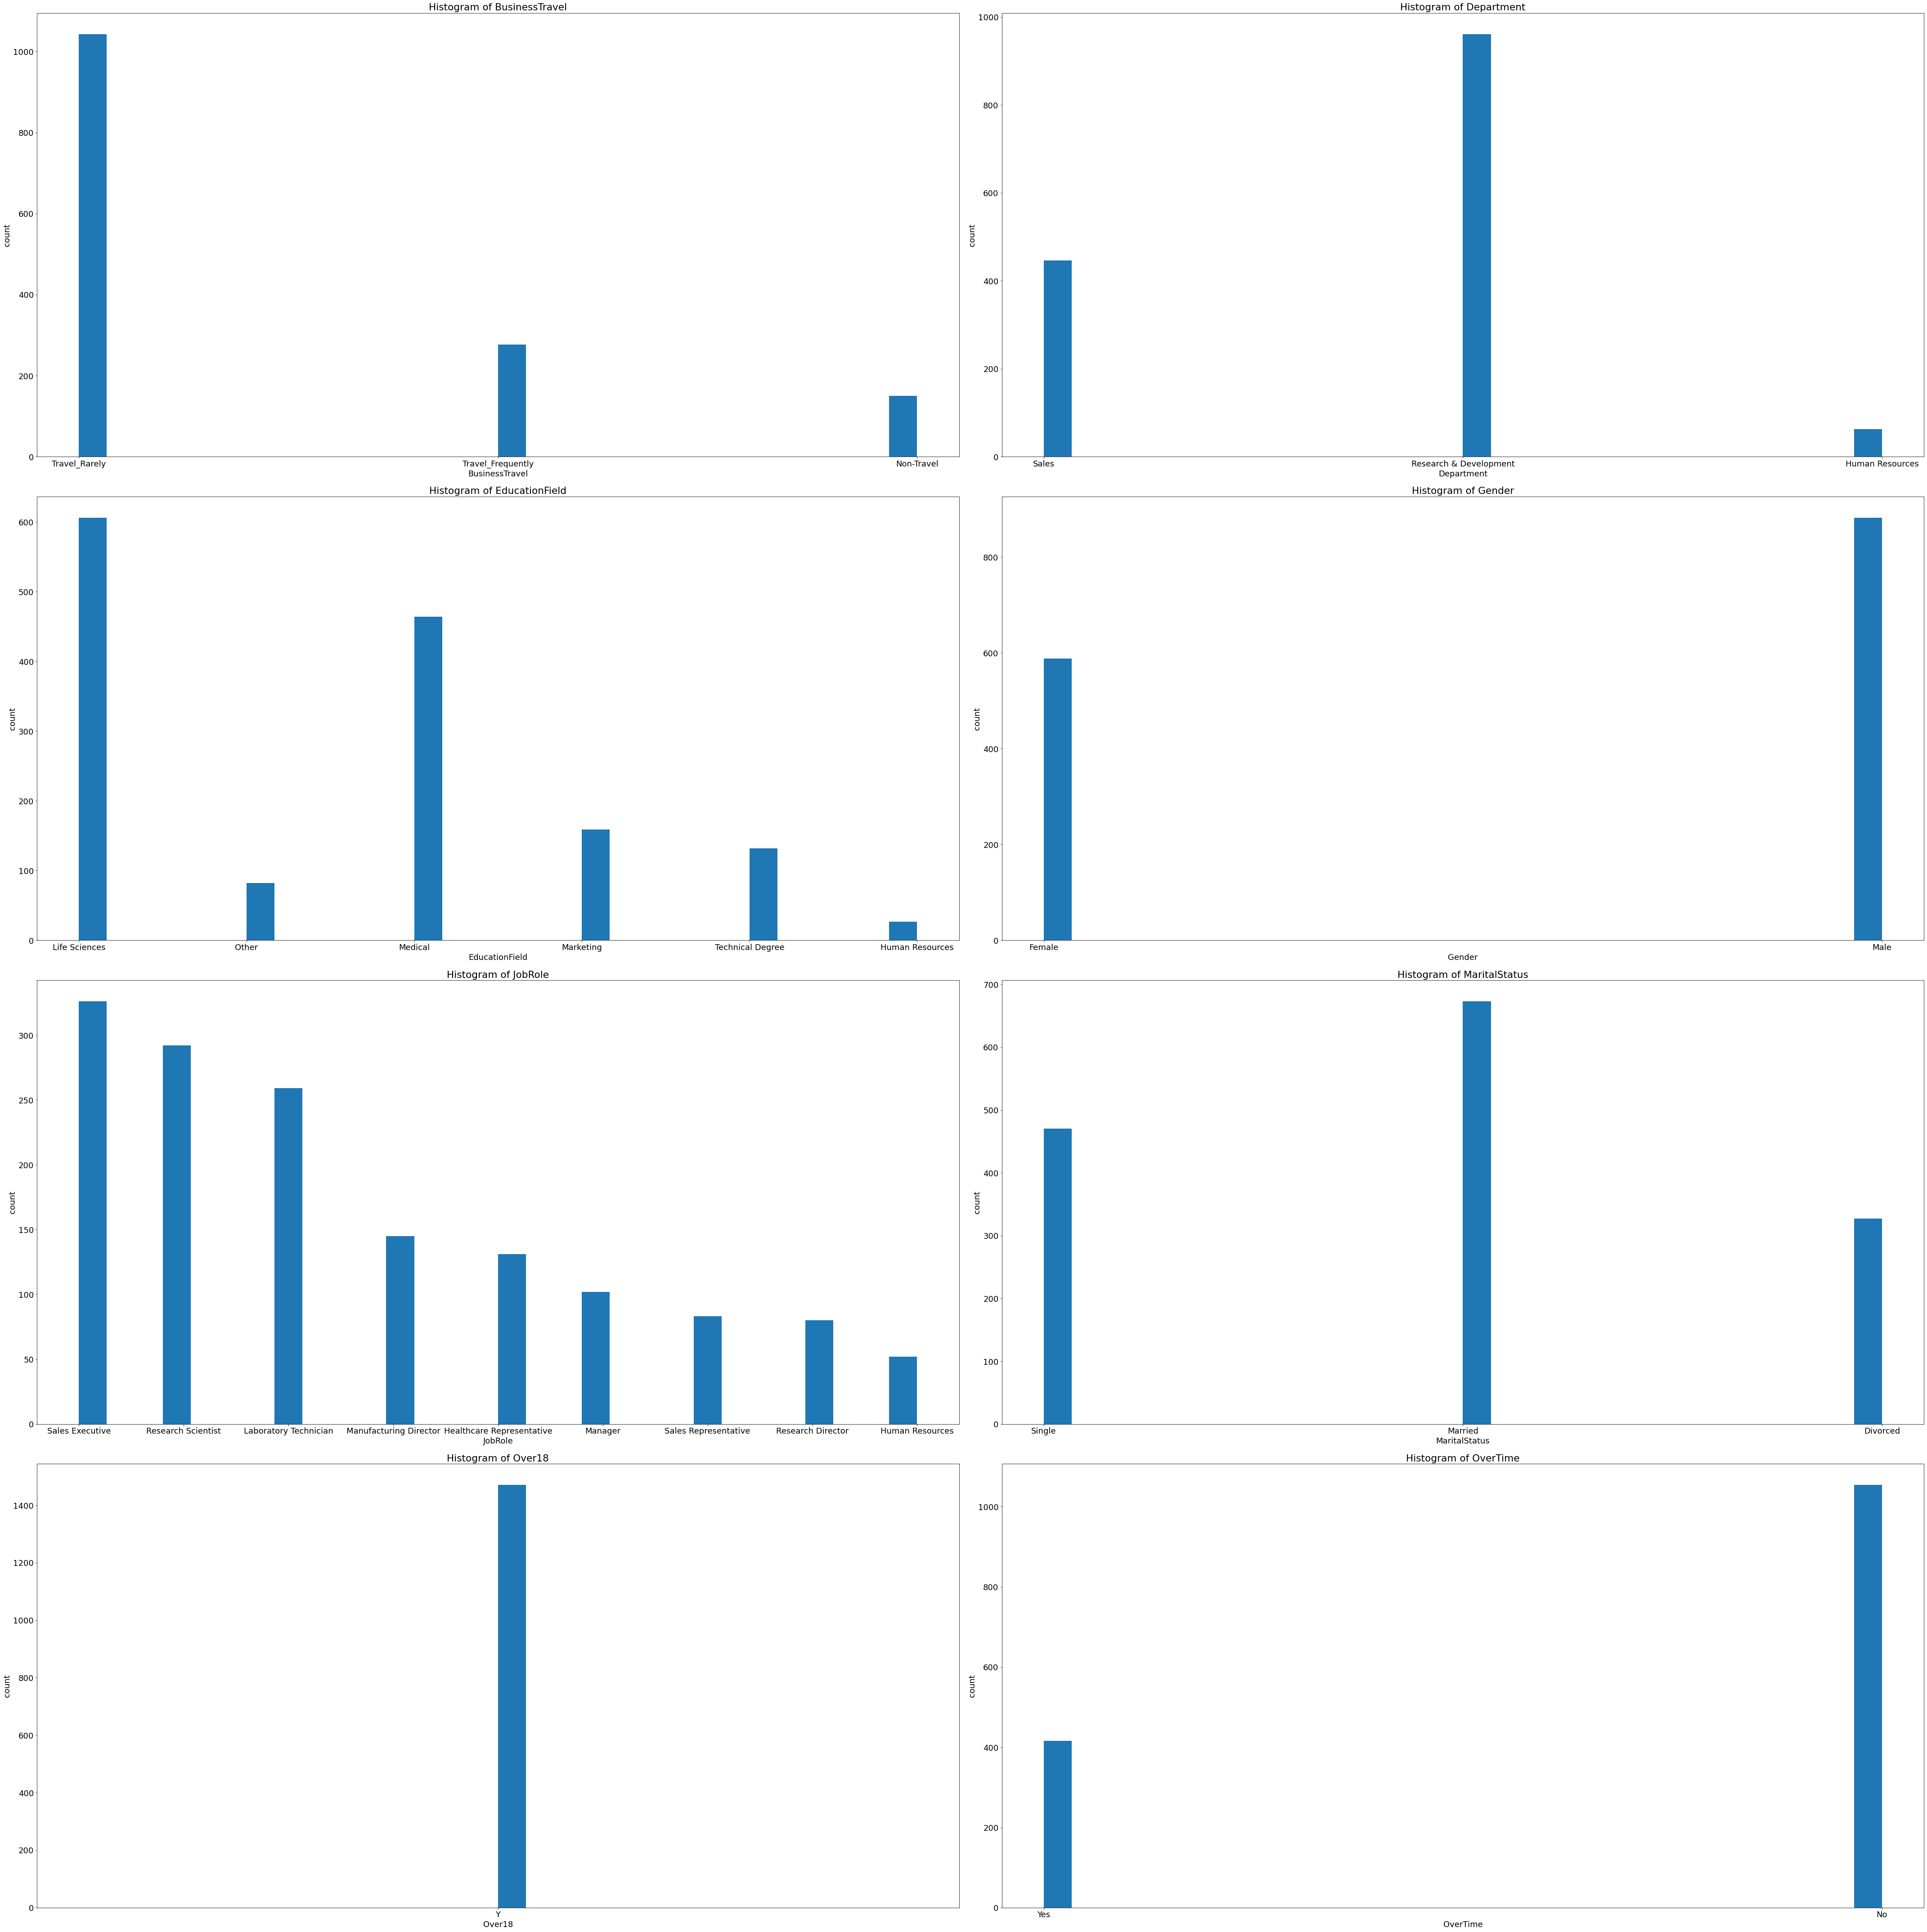

In [9]:
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(4,2, figsize=(60,60))

categorical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = categorical_val[categorical_var_count]

        ax[i, j].hist(categorical_df[x],bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].set(title='Histogram of '+x)
        categorical_var_count = categorical_var_count + 1
        
plt.tight_layout()

| Variable | Incomplete Data | Noisy Data | Inconsistent Data | Intentional Data | Meaningless Data |
| --- | --- | --- | --- | --- | --- |
|Age	|No	|No	|No	|No	|No|
|Attrition	|No	|No	|No	|No	|No|
|DailyRate	|No	|No	|No	|No	|No|
|DistanceFromHome	|No	|No	|No	|No	|No|
|Education	|No	|No	|No	|No	|No|
|EmployeeCount	|No	|No	|No	|**Yes**	|**Yes**|
|EnvironmentSatisfaction	|No	|No	|No	|No	|No|
|HourlyRate	|No	|No	|No	|No	|No|
|JobInvolvement	|No	|No	|No	|No	|No|
|JobLevel	|No	|No	|No	|No	|No|
|JobSatisfaction	|No	|No	|No	|No	|No|
|MonthlyIncome	|No	|**Yes**	|No	|No	|No|
|MonthlyRate	|No	|No	|No	|No	|No|
|NumCompaniesWorked	|No	|**Yes**	|No	|No	|No|
|PercentSalaryHike	|No	|No	|No	|No	|No|
|PerformanceRating	|No	|**Yes**	|No	|No	|No|
|RelationshipSatisfaction	|No	|No	|No	|No	|No|
|StandardHours	|No	|No	|No	|**Yes**	|**Yes**|
|StockOptionLevel	|No	|**Yes**	|No	|No	|No|
|TotalWorkingYears	|No	|**Yes**	|No	|No	|No|
|TrainingTimesLastYear	|No	|**Yes**	|No	|No	|No|
|WorkLifeBalance	|No	|No	|No	|No	|No|
|YearsAtCompany	|No	|**Yes**	|No	|No	|No|
|YearsInCurrentRole	|No	|**Yes**	|No	|No	|No|
|YearsSinceLastPromotion	|No	|**Yes**	|No	|No	|No|
|YearsWithCurrManager	|No	|**Yes**	|No	|No	|No|
|BusinessTravel	|No	|No	|No	|No	|No|
|Department	|No	|No	|No	|No	|No|
|EducationField	|No	|No	|No	|No	|No|
|Gender	|No	|No	|No	|No	|No|
|JobRole	|No	|No	|No	|No	|No|
|MaritalStatus	|No	|No	|No	|No	|No|
|Over18	|No	|No	|No	|**Yes**	|**Yes**|
|OverTime	|No	|No	|No	|No	|No|


The table summarized the variables are either incomplete, noisy, inconsistent, intentional or meaningless.
It can be observed that majority of the variables are normal and good for further analysis.

#### Descriptive and Exploratory Analysis

1. Numerical Histogram
- Univariate Analysis
- To explore the numerical variable distributions. 

**It can be observed that:**
- Most of the employees' age are between 30 and 40. 
- Most of them stay near to the company.
- Majority are having a monthly income between 2500 and 5000. 
- Most of them worked for 5 to 10 years, yet majority worked for 10 years. 

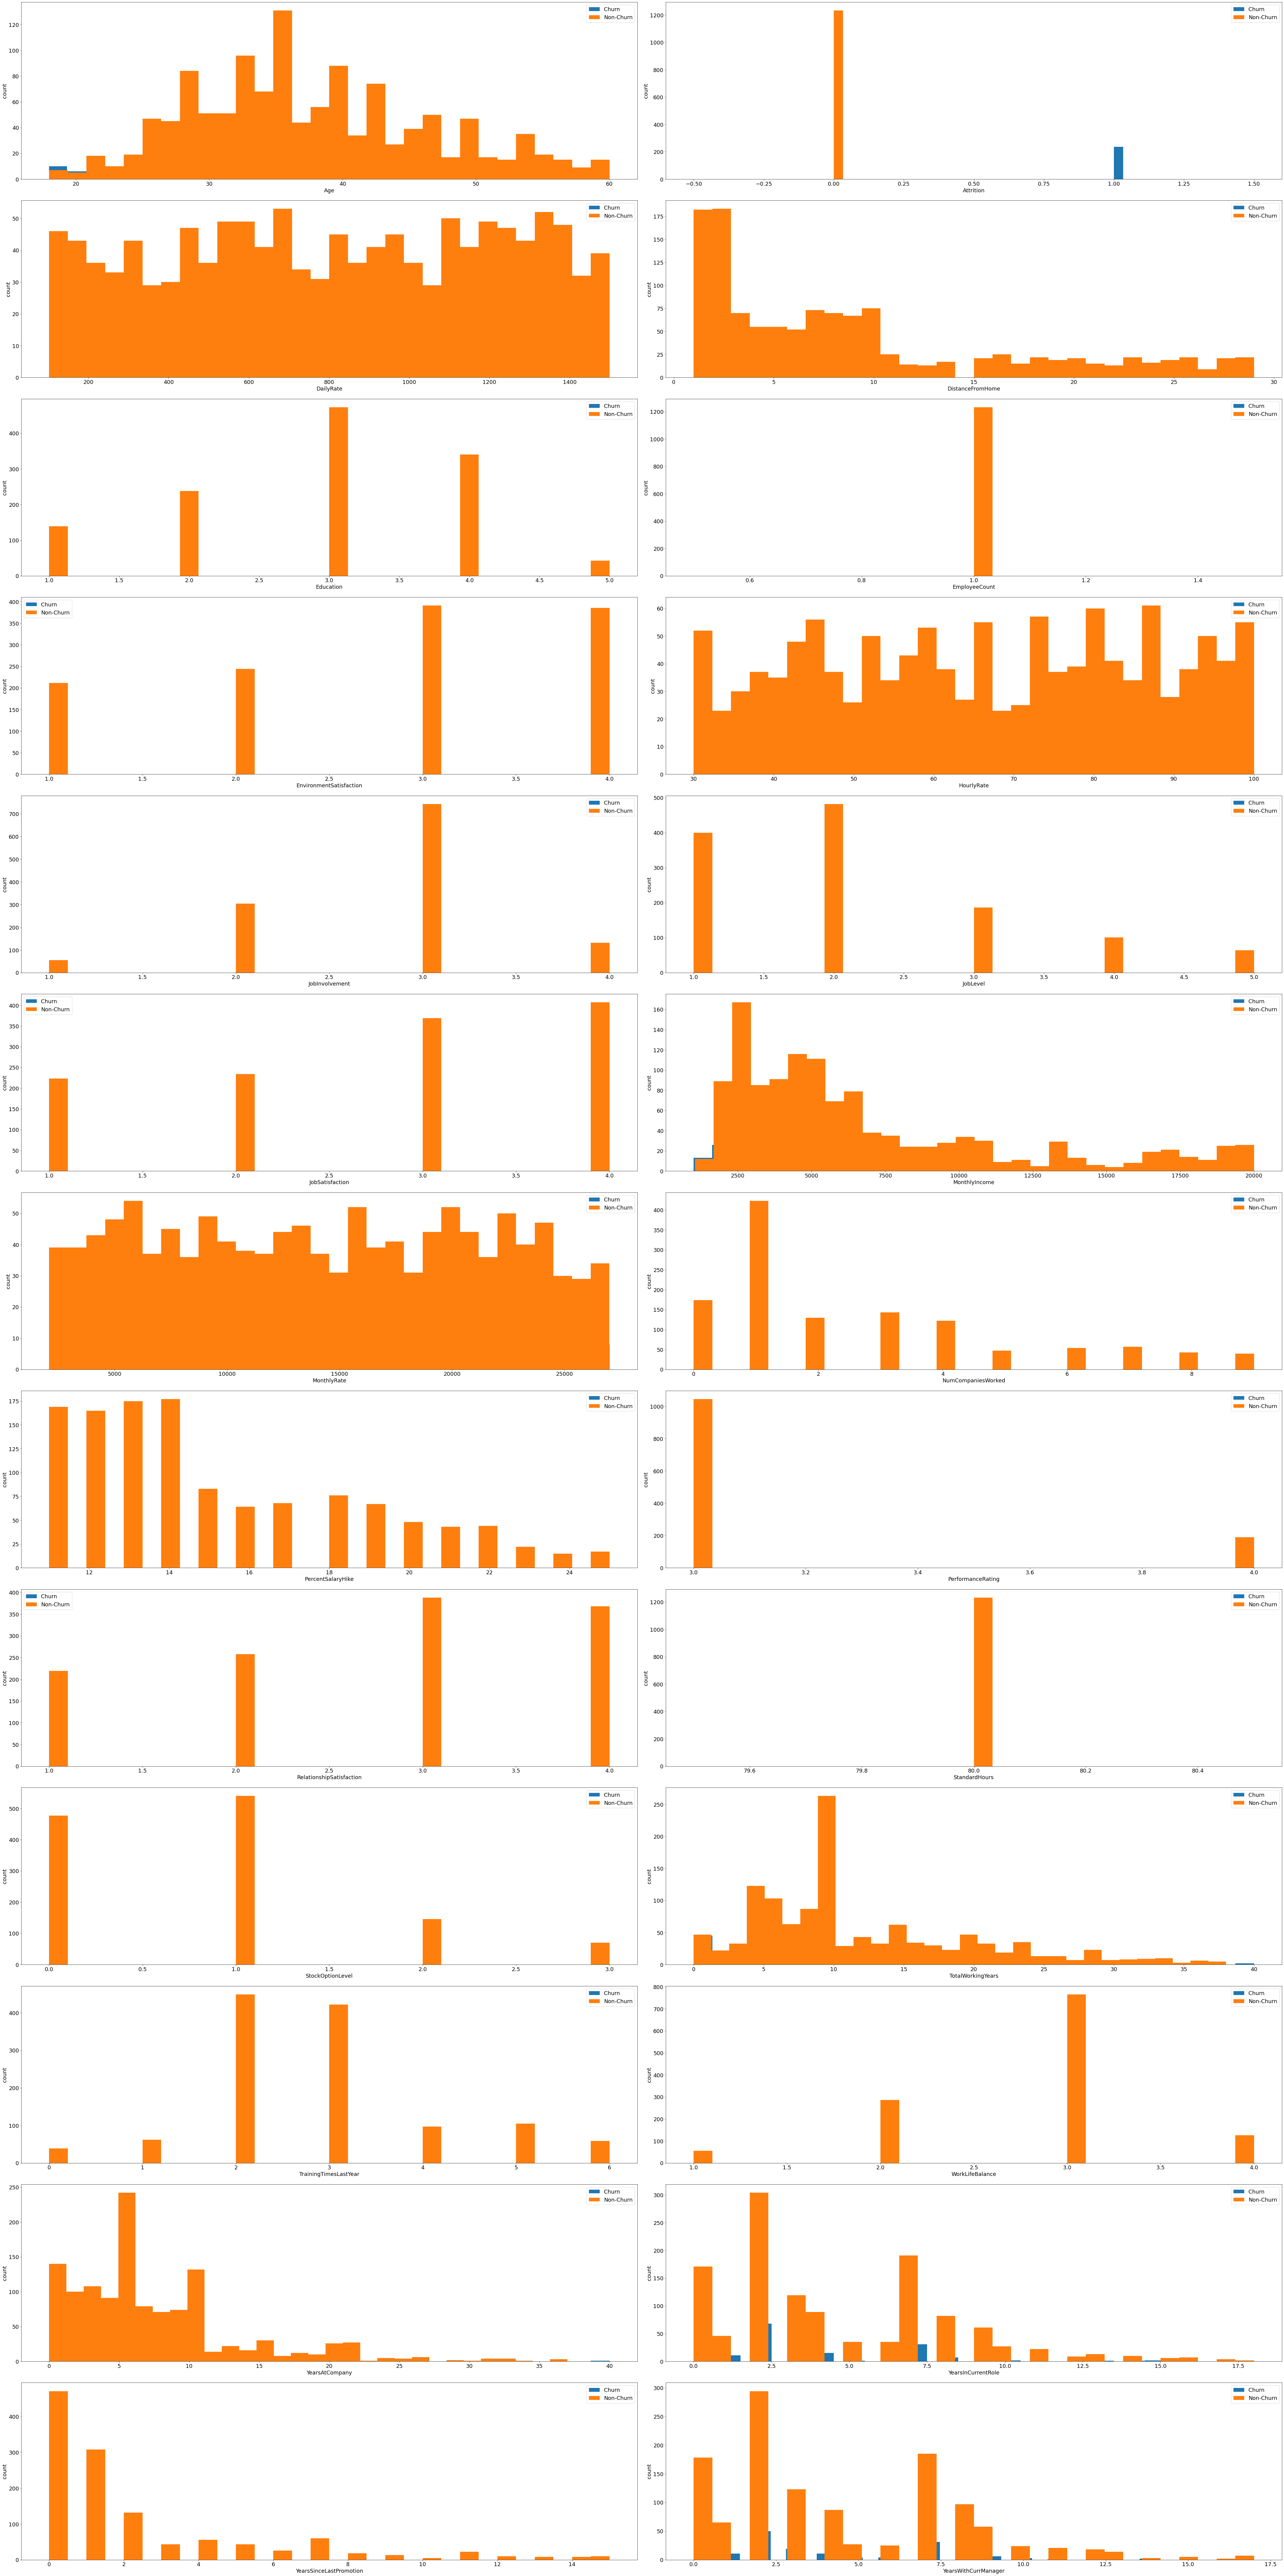

In [10]:
fig , ax = plt.subplots(13,2, figsize=(60,120))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = numerical_val[numerical_var_count]

        ax[i, j].hist(numerical_df[numerical_df[target[0]]==1][x],label='Churn',bins=30)
        ax[i, j].hist(numerical_df[numerical_df[target[0]]==0][x],label='Non-Churn',bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].legend()
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

2. Numerical Boxplot
- Bivariate Analysis 
- To explore the numerical variable outliers and the relationships of the attributes.
- It can be observed that there are outliers in Age, JobLevel, NumberCompaniesWorked, PercentSalaryHike, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager 

**Observation:**
- **Churners are younger.** Younger generation tends to be more frequent in job-hopping compared to older generation as there are more working opportunities in the industry nowadays. 
- **Churners tend to stay far away from company.** The individual might not think of to find a place which nearner to company, in order to reduce commute and less traffic.
- **Churners tend to work for more companies.** This may reflect that the individual has a more challenging attitude as they want to explore different opportunities with different company.
- **Churners tend to have a low job level with low monthly income.** They are more likely **not satisfied to the job** but shorter working hours. Hence, they have a **shorter tenure in company, with manager and current role.** 

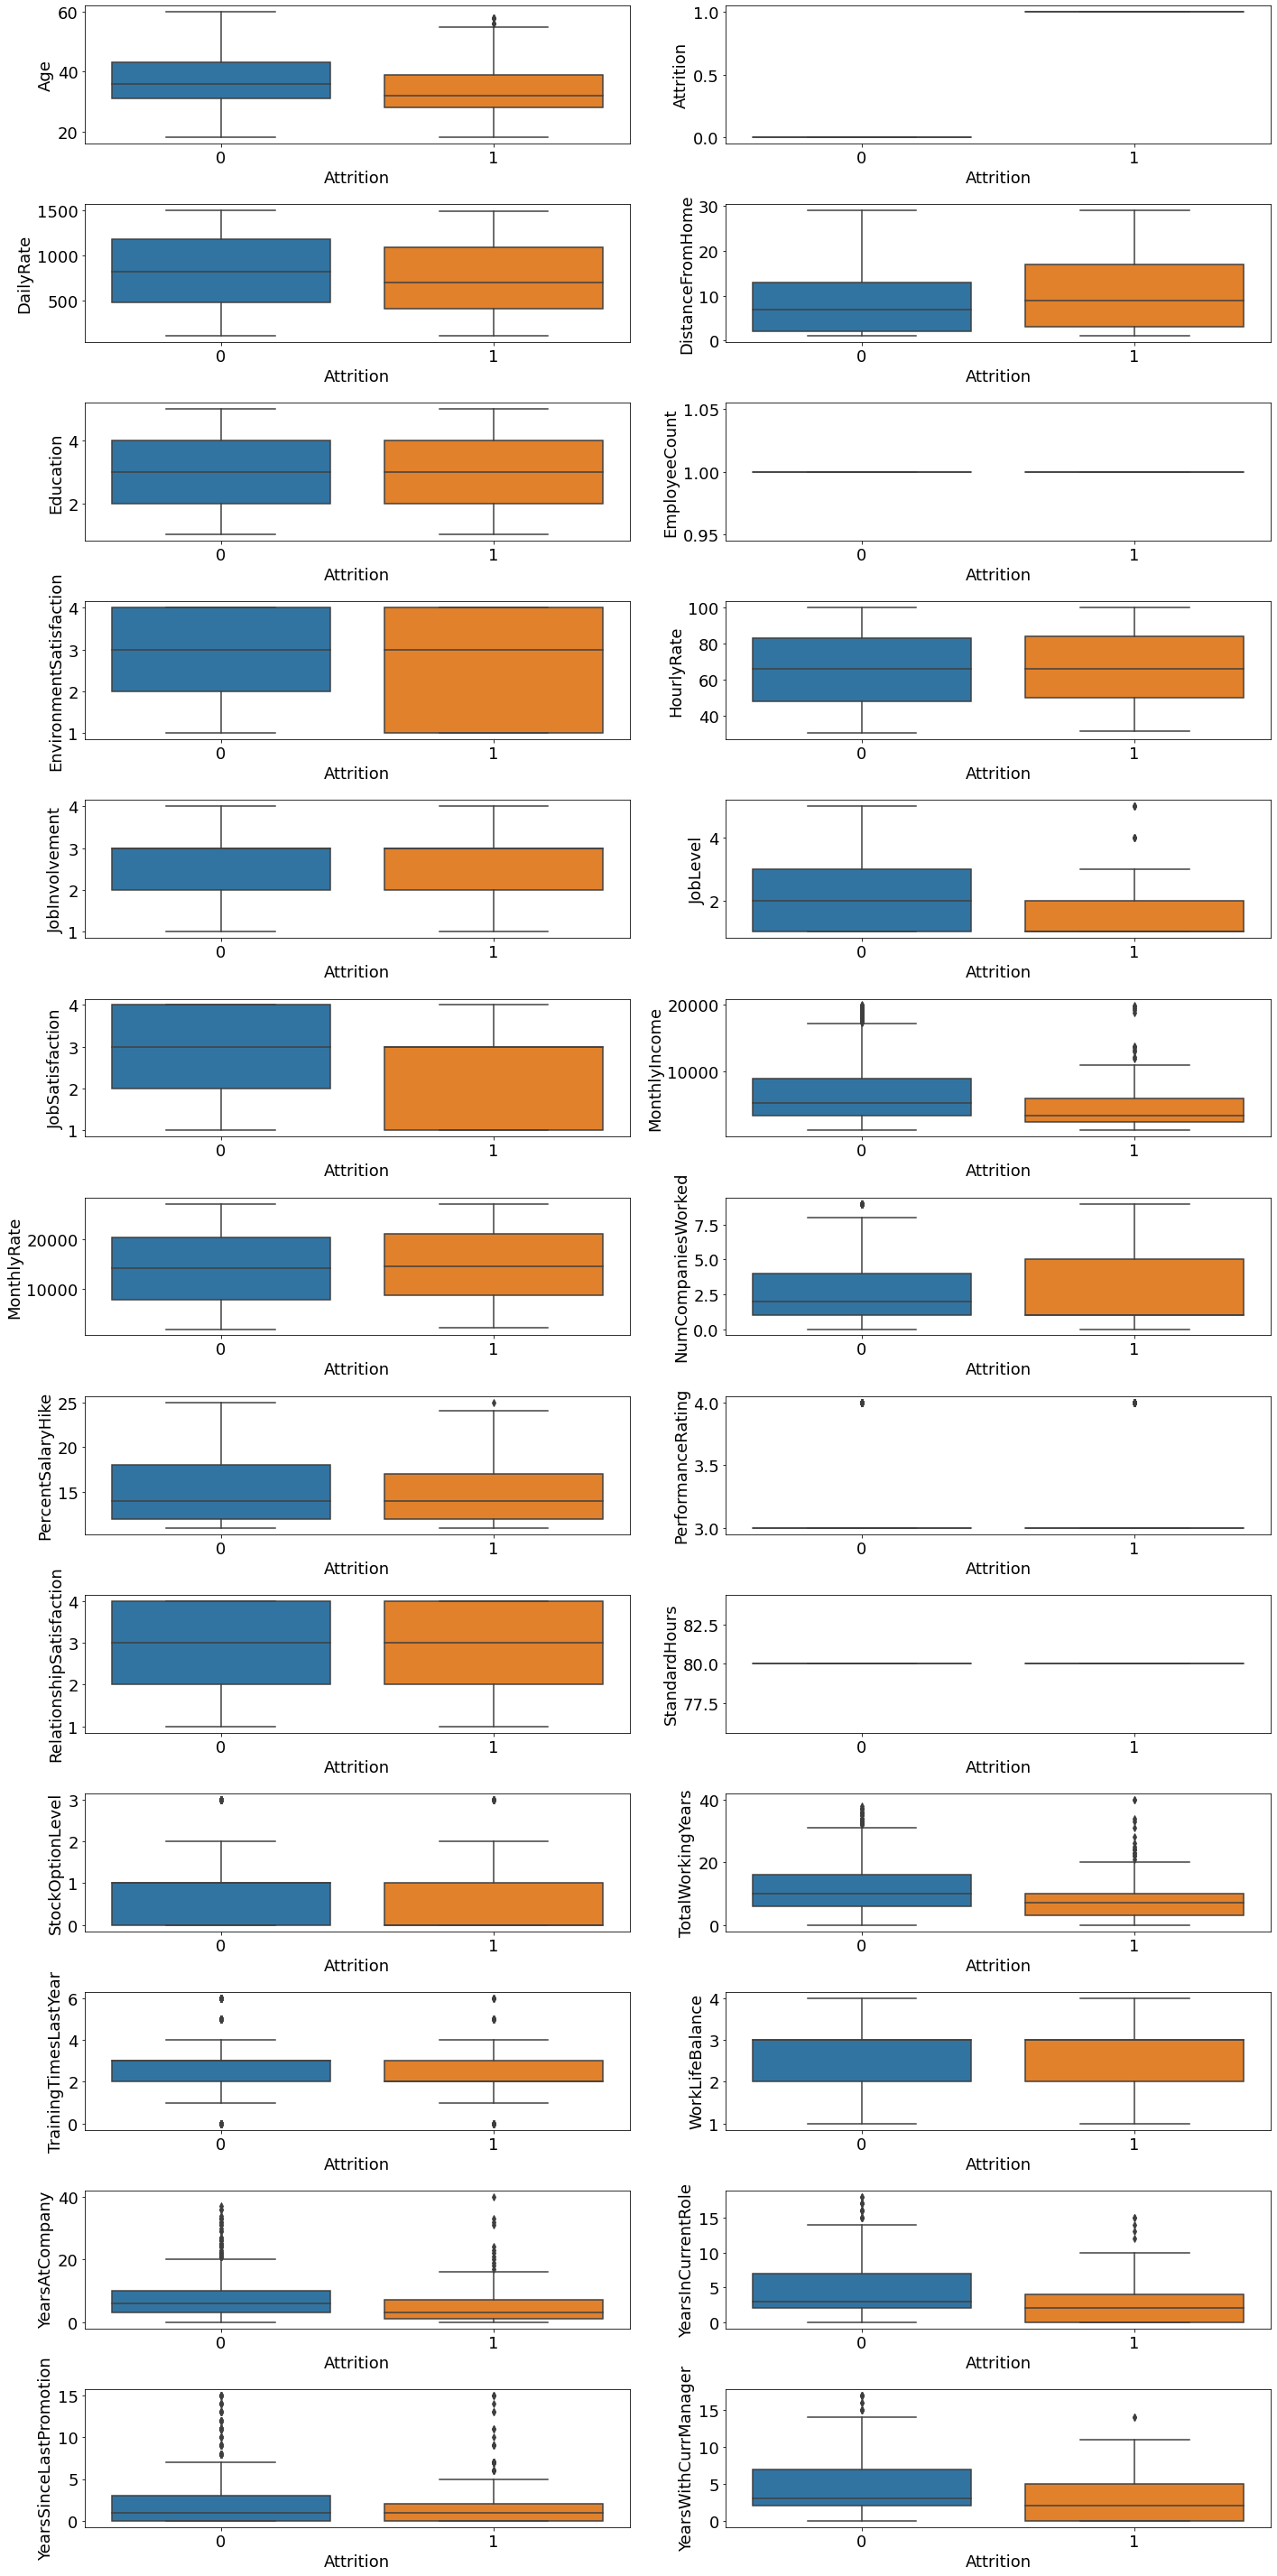

In [11]:
fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df['Attrition'], y=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel='Attrition', ylabel=k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

3. Categorical Barplot 
- Univariate analysis
- To explore the categorical variable distribution. 

**Observation:**
- Majority of the employee rarely travel and no overtime. 
- Most of the employee are from researtch & development department. The employees are mostly come from life sciences, followed by other, medical then marketing, technical degree and human resource. 
- Most of the employee are male. 
- Minority of the employee are still single. 

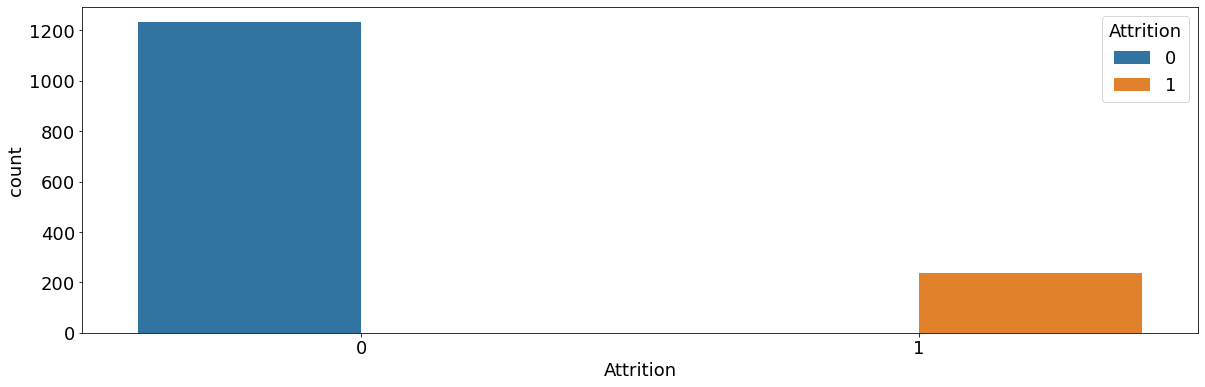

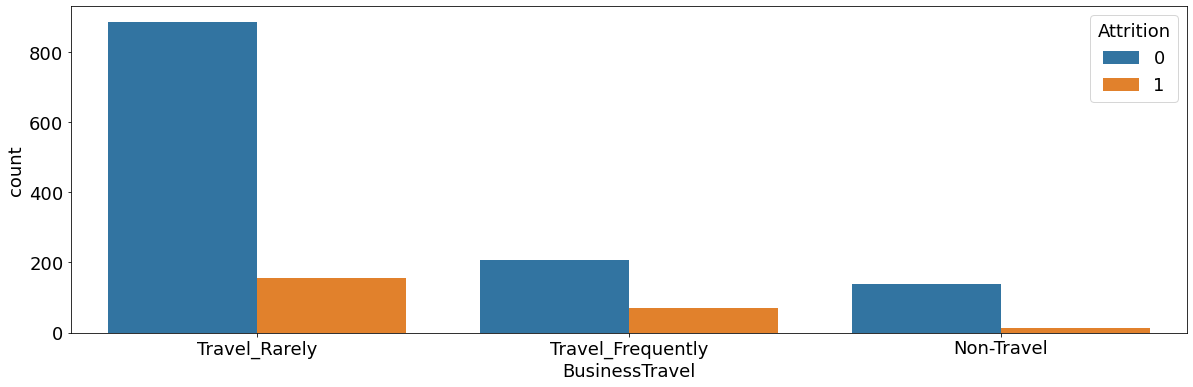

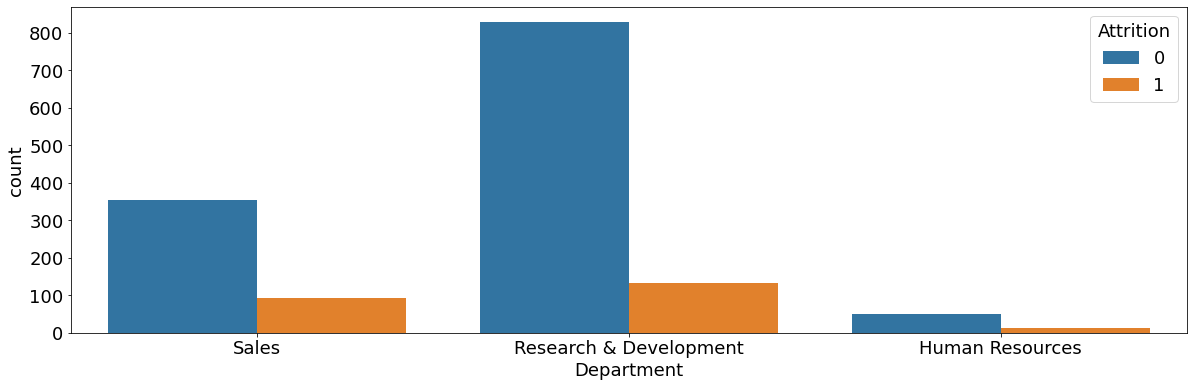

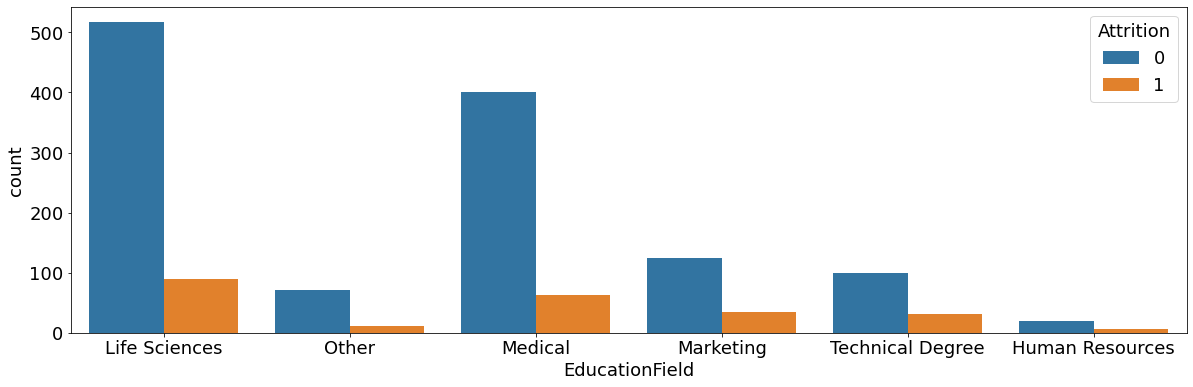

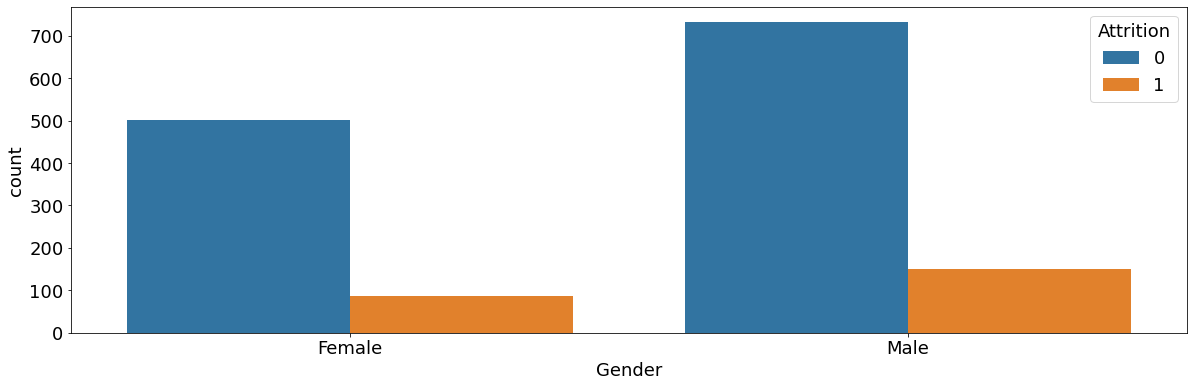

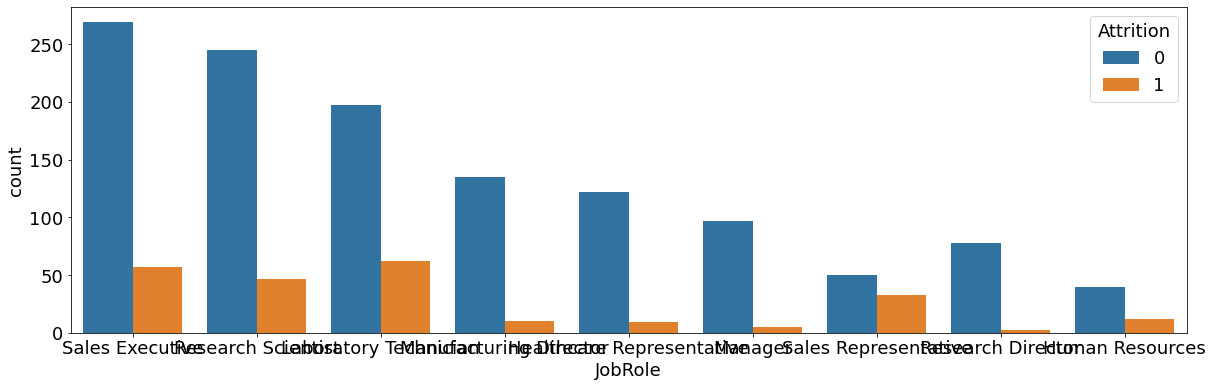

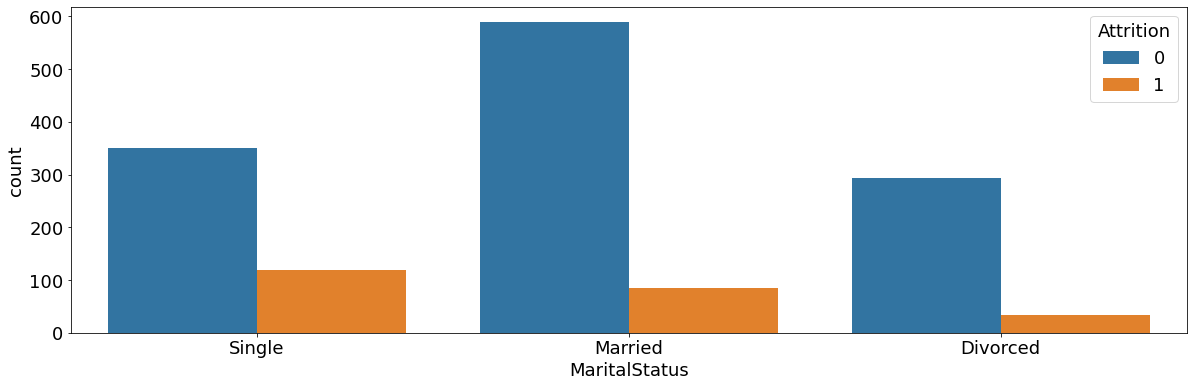

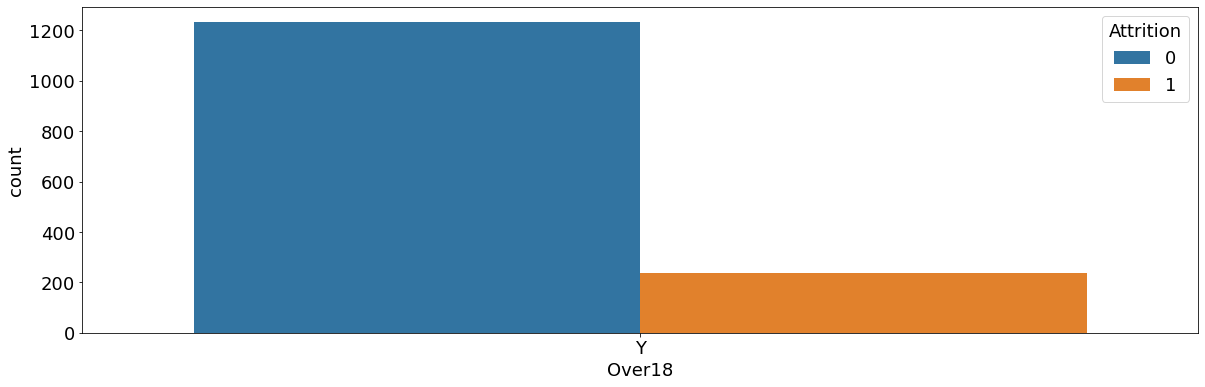

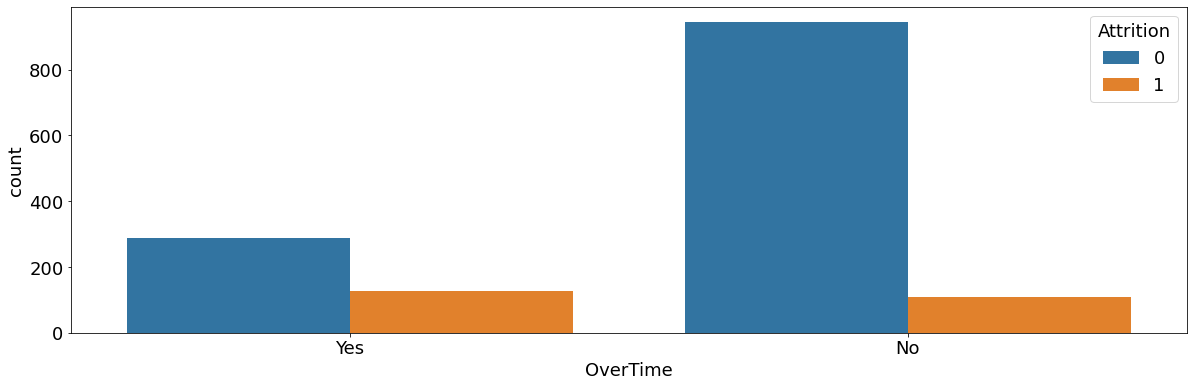

In [12]:
for i, col in enumerate(categorical_df):
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, hue="Attrition", data=categorical_df)

4. Scatterplot
- To explore multivariate analysis.

**Observation:**
- The longer the working years in company, the higher the job level, and the higher the monthly income. 
- Employees' performance rating affect the percentage of salary hike. It does not related with the employees' age and education. 
- The longer the working years in company, the longer the tenure in current role and company. It shows that the employee will have a better relationship with current manager. 
- Overtime do affect the employee to consider resign or not regardless of age.

### Data Pre-processing
#### Data Cleaning

#### <a style="color:blue;">Missing value</a>
- There is no missing value in the dataset.

In [13]:
#Missing values in dataset
print ("\nMissing values: ", dataset.isnull().sum().values.sum())

#Missing values details
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_values = pd.DataFrame({'column_name': dataset.columns,'percent_missing': percent_missing})
missing_values.sort_values('percent_missing', ascending = False, inplace=True)
print ("\nMissing values for each variables: ", missing_values)


Missing values:  0

Missing values for each variables:                                         column_name  percent_missing
Age                                            Age              0.0
StandardHours                        StandardHours              0.0
NumCompaniesWorked              NumCompaniesWorked              0.0
Over18                                      Over18              0.0
OverTime                                  OverTime              0.0
PercentSalaryHike                PercentSalaryHike              0.0
PerformanceRating                PerformanceRating              0.0
RelationshipSatisfaction  RelationshipSatisfaction              0.0
StockOptionLevel                  StockOptionLevel              0.0
Attrition                                Attrition              0.0
TotalWorkingYears                TotalWorkingYears              0.0
TrainingTimesLastYear        TrainingTimesLastYear              0.0
WorkLifeBalance                    WorkLifeBalance         

#### <a style="color:blue;">Meaningless value</a>
- To check and drop unecessary columns: Over18, EmployeeCount, StandardHours
- These columns displayed the same value for each records.

**Definition:**

* EmployeeNumber indicates the identity of employee in the company.
* Over18 indicates the age of employee in the company must be over 18 years old. 
* EmployeeCount indicates the count of unique employee in the company. 
* StandardHours indicates the standard working hours (80 hours) of employee in the company.

In [14]:
dataset.drop(['Over18','EmployeeCount','StandardHours'],axis='columns',inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert OverTime to numerical label - Yes indicates 1 and No indicates 0</a>

In [15]:
dataset.OverTime.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Data Integration - Correlation

#### <a style="color:blue;">Correlation Matrix Heatmap</a>
- Numerical variables only

**It can be observed that:** 
- The higher the job level, the higher the monthly income. 
- The higher the job level, the longer the total working years. 
- The longer the total working years, the higher the monthly income.
- The higher the performance rating , the higher the percent salary hike.
- The longer the years at company, the longer the years in current role. 
- The longer the years at company, the longer the years with current manager. 
- The longer the years with current manager, the longer the years in current role.  

<AxesSubplot:>

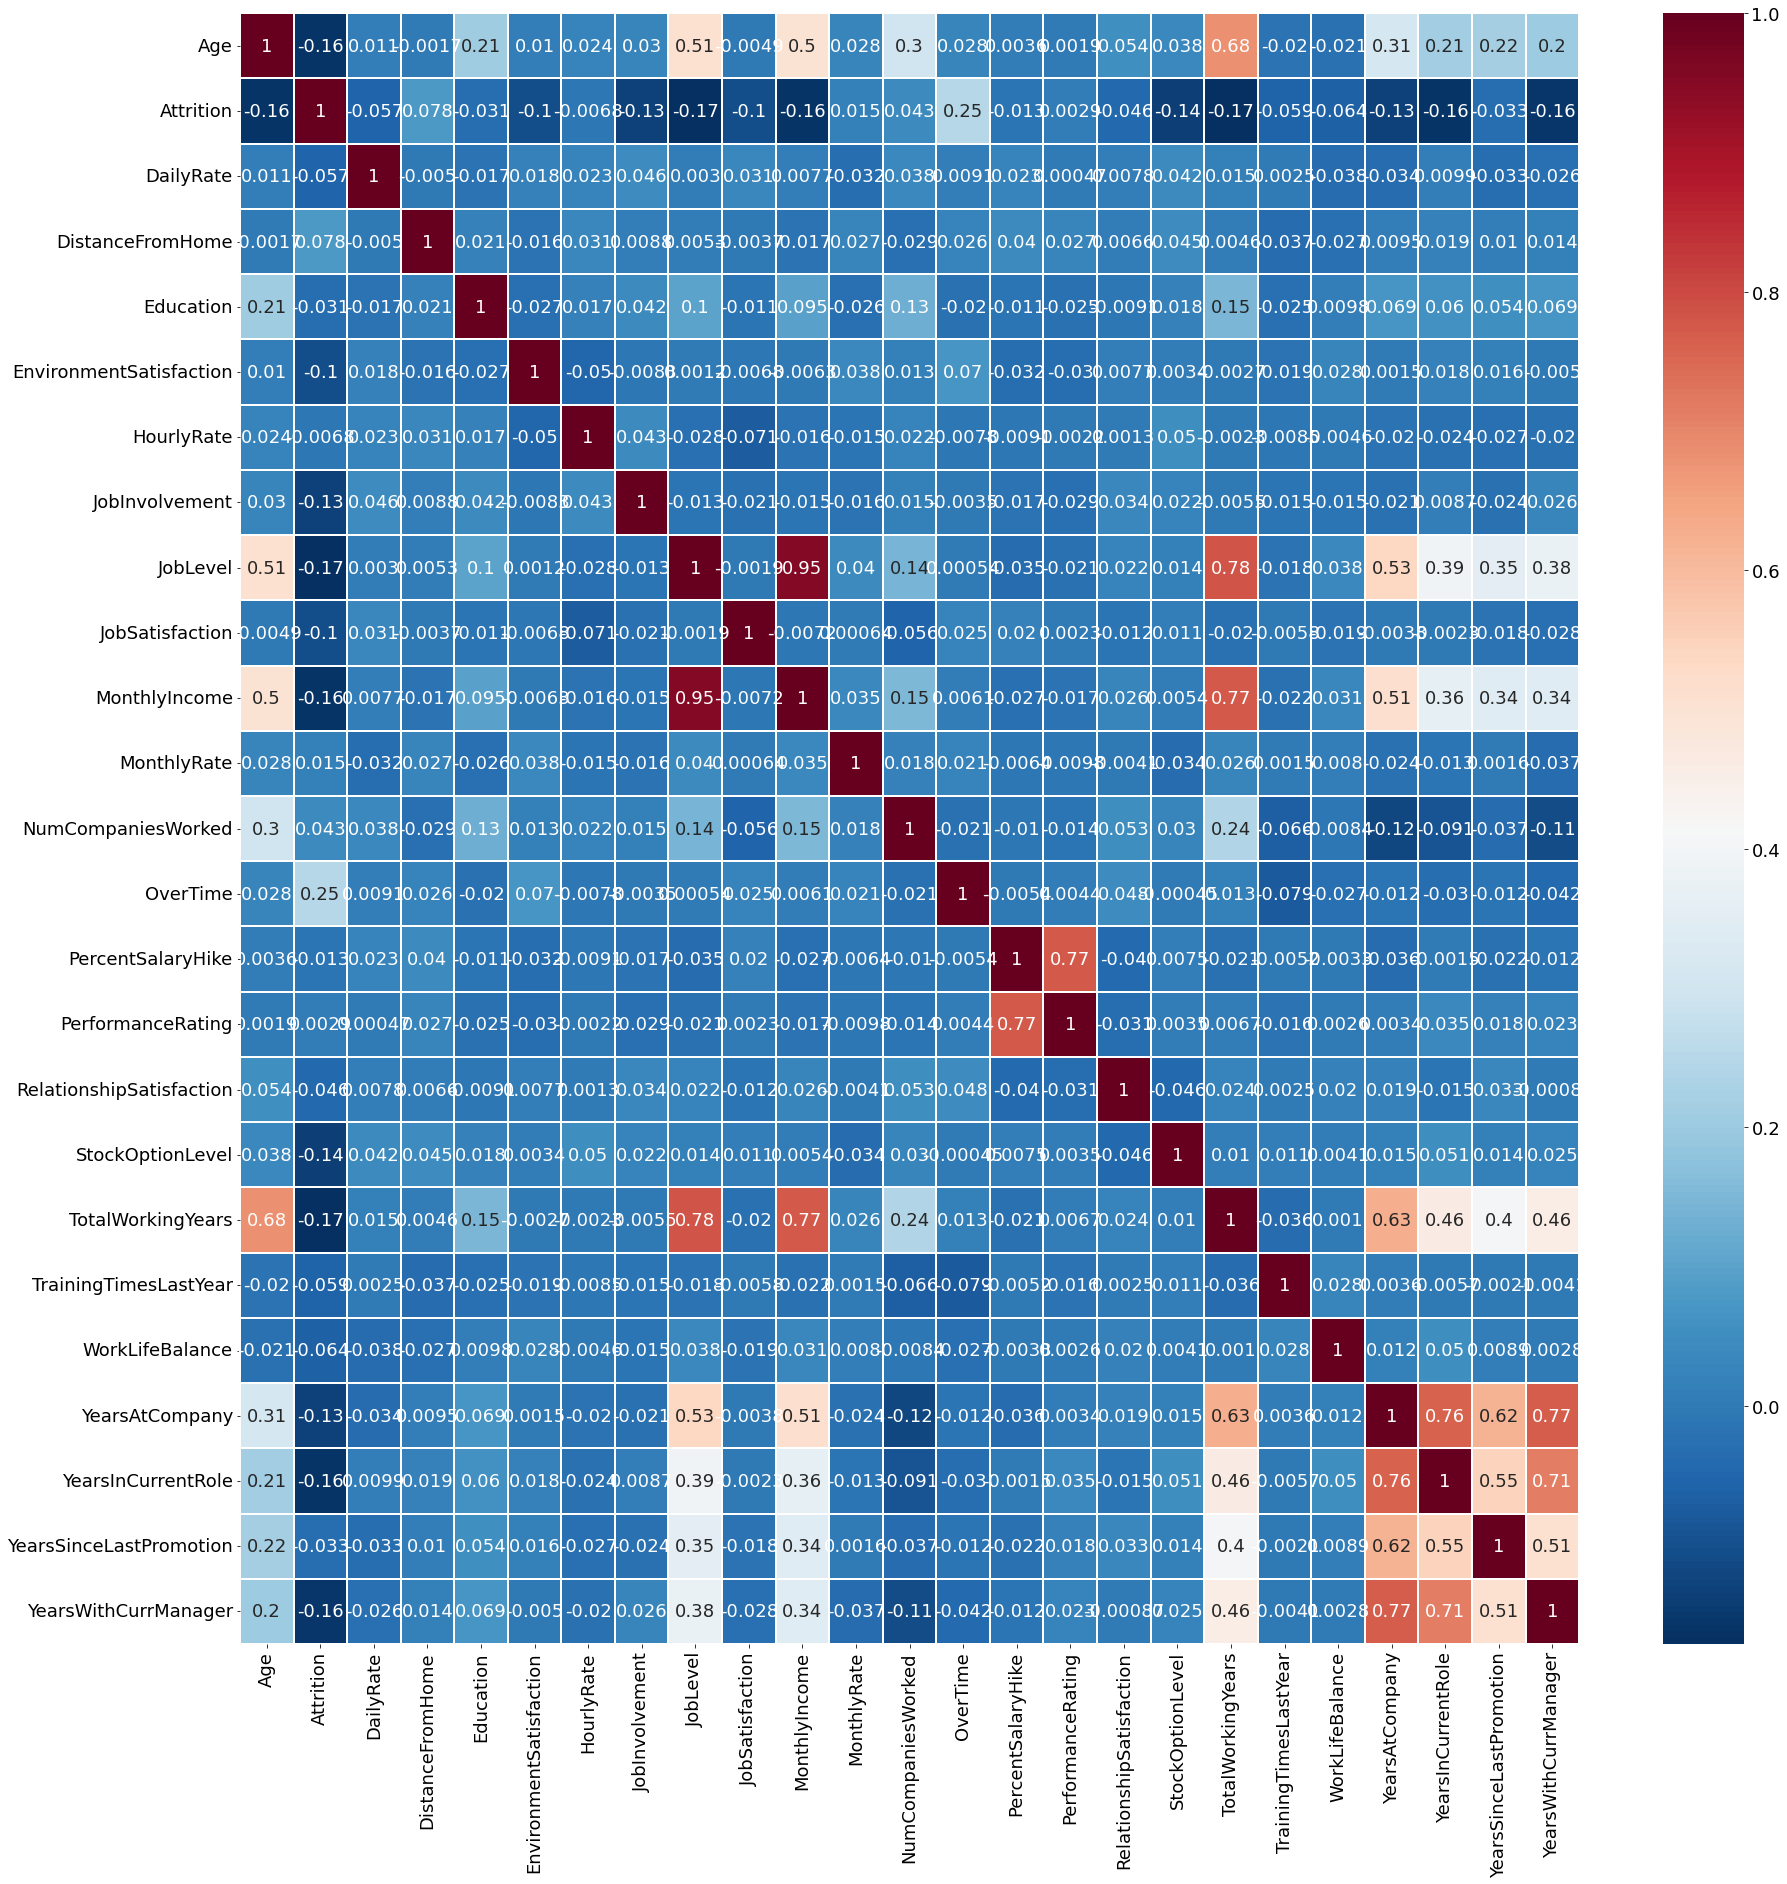

In [16]:
#Correlation Matrix 
#df_numerics_only = dataset.select_dtypes(include=np.number)
#df_numerics_only.corr()

#Correlation Matrix Heatmap
pearsoncorr = dataset.corr(method='pearson')
pearsoncorr = pearsoncorr[((pearsoncorr >= .5) | (pearsoncorr <= -.5)) & (pearsoncorr !=1.000)]
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(method='pearson'), 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.4)

#### <a style="color:blue;">Correlation Matrix Heatmap (Correlation > +-0.8)</a>
- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.8 or -0.8. 

Correlation > 0.8: 


JobLevel         0.9503
MonthlyIncome    0.9503
dtype: float64

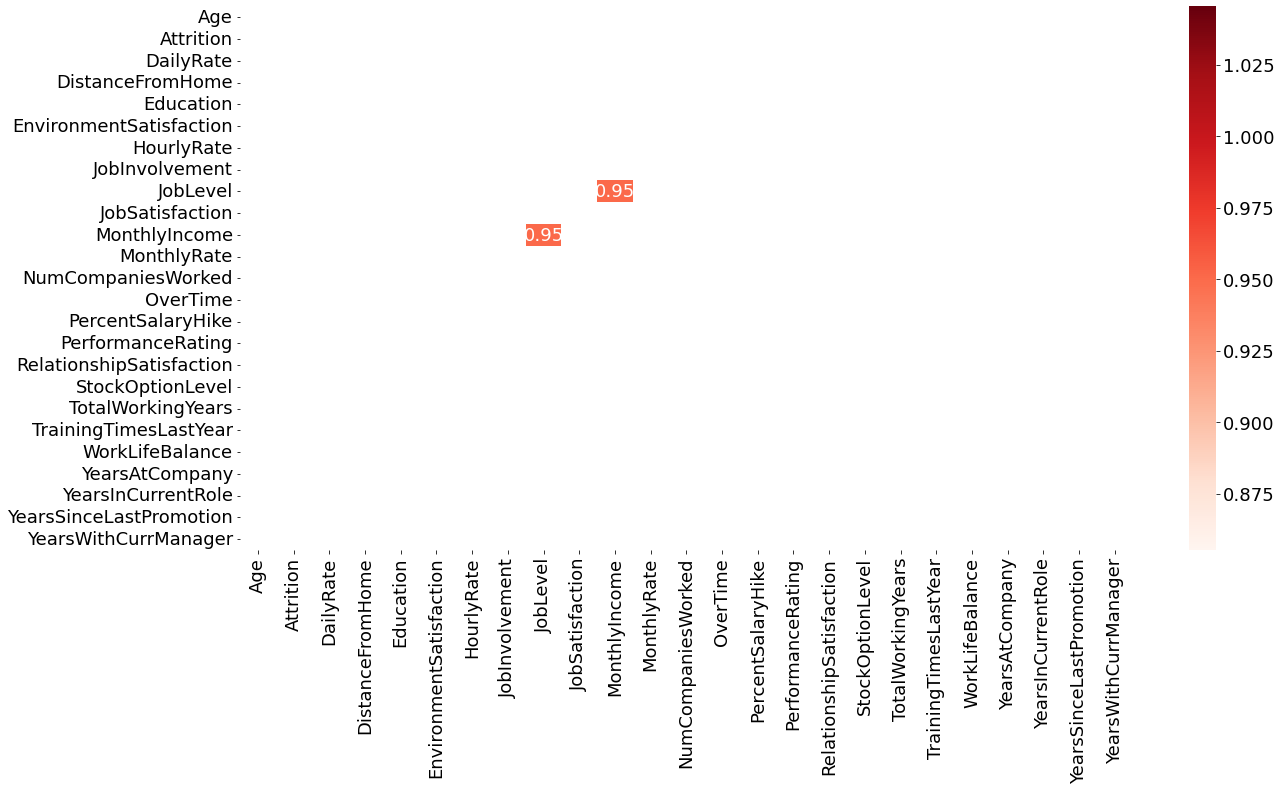

In [17]:
corr = dataset.corr().abs()
corr[corr == 1] = 0
corr_cols = corr.max().sort_values(ascending=False)
print("Correlation > 0.8: ")
display(corr_cols[corr_cols > 0.8])

dfCorr = dataset.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [18]:
#### <a style="color:blue;">ScatterPlot (Correlation > +-0.7)</a>
#- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.7 or -0.7. 
#g = sns.PairGrid(dataset, vars=['MonthlyIncome', 'YearsWithCurrManager', 'JobLevel','TotalWorkingYears',
#                                'PerformanceRating','PercentSalaryHike','YearsAtCompany','YearsInCurrentRole'
#                                ],hue='Attrition', palette='RdBu_r')
#g.map(plt.scatter, alpha=0.8)
#g.add_legend();

#### Data Reduction - Principle Component Analysis (PCA)
- Principal Component Analysis (PCA) is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#### <a style="color:blue;">Dataset are seperated into numerical and categorical.</a>

In [19]:
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64' and i != 'Attrition']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#### <a style="color:blue;">Label encoding is applied to categorical variable.</a>
- Not using one hot encoding because the categorical are not ranked in order.

In [20]:
dataset_cat_encoded = pd.get_dummies(dataset[categorical], columns= [i for i in dataset[categorical].columns if dataset[categorical][i].dtypes=='object'],drop_first=False)

#### <a style="color:blue;">Merge numerical and categorical.</a>

In [21]:
dataset_encoded = pd.merge(dataset[numerical], dataset_cat_encoded, left_index=True, right_index=True, how="left")
dataset_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [22]:
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_encoded))
dataset_scaled.columns = dataset_encoded.columns.values
dataset_scaled.index = dataset_encoded.index.values
dataset_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
2,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
5,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
7,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565


#### <a style="color:blue;"> Fit standardized data into PCA.</a>

In [23]:
pca = PCA(n_components = 25) 
pca_fit = pca.fit_transform(dataset_scaled) 

#### <a style="color:blue;">Explained Variance Ratio</a>
- The percentage of variance that is attributed by each of the selected components. Ideally, number of components to include in the model by adding the explained variance ratio of each component till around 0.8 or 80% to avoid overfitting.
- Based on the cumulative variance plot, the optimal number of components is 25. Meaning, 25 features are required to explain the model correctly. Data dimentionality could be reduced from 50 to 25. 

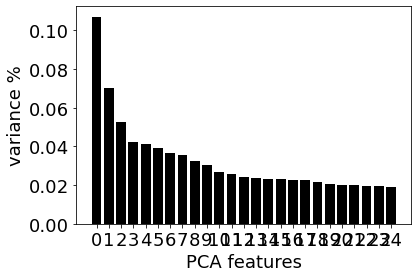

In [24]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features) 
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

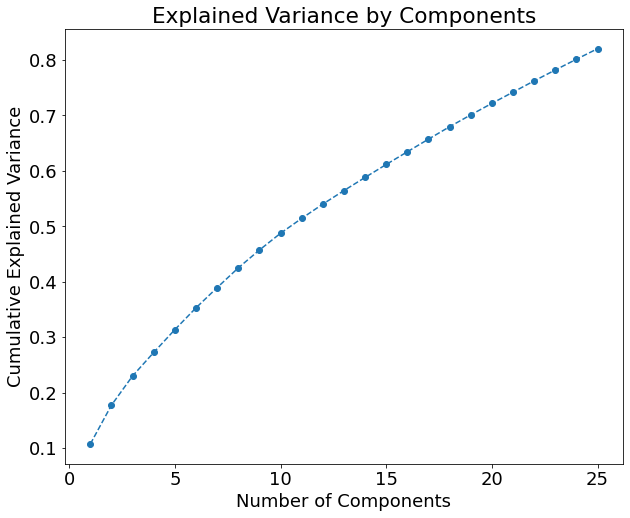

In [25]:
#Decide how many feature to keep based on the cumulative variance plot. Optimal 25 variables or variance >80%
plt.figure(figsize=(10, 8))
plt.plot(range(1,26), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance' )

#### <a style="color:blue;">Important features based on PCA</a>
- Principal component of 1st, 2nd, 5th, 6th, 7th: 
    * Weak correlation with respective original variables. 
    * These criterias do not vary together. If one increases, then the remaining ones remain unchange.

- Principal component of 3rd: Correlated with Job role and Department (HR).
- Principal component of 4th, 10th: Correlated with Marital status (single, divorced).
- Principal component of 8th: Correlated with increasing Percent salary hike and performance rating. 
- Principal component of 9th: Correlated with Education field (Medical).

In [26]:
pca = PCA(n_components = 25) 
pca.fit(dataset_scaled) 
df_pca = pca.transform(dataset_scaled)

#Get the most important features, to understand which features are important for that component 
def create_importance_dataframe(pca, Y):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)
    
    # Assign columns
    importance_df.columns = Y.columns
    
    # Change to absolute values
    # importance_df =importance_df.apply(np.abs)
    
    # Transpose
    importance_df=importance_df.transpose()
    
    # Change column names again
    ## First get number of pcs
    num_pcs = importance_df.shape[1]
    
    ## Generate the new column names
    new_columns = [i for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df
   
# Call function to create importance df
importance_df = create_importance_dataframe(pca, dataset_scaled)

# Show first few rows
display(importance_df.head())

# Top 10 for PC 1 - PC 20
for i in importance_df.columns:
    top_10_features = importance_df[i].sort_values(ascending = False)[:10]
    print(), print(f'pc{i}_top_10_featuress are \n'.format(i=i))
    display(top_10_features)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Age,0.258198,-0.065042,0.046985,0.009796,-0.156386,0.118675,0.165432,0.058286,-0.051507,-0.043318,...,0.003633,-0.091501,-0.061368,-0.042367,-0.064606,0.028220,-0.162120,0.024038,0.059497,0.086481
DailyRate,-0.002080,-0.020960,-0.012308,-0.076109,-0.071497,-0.022676,0.043549,0.007861,0.010588,-0.019129,...,-0.087659,-0.255774,0.202113,-0.458553,0.367478,0.222856,0.146262,-0.132503,-0.191572,-0.099634
DistanceFromHome,0.003015,0.010206,-0.016443,-0.057589,0.008013,-0.060761,0.006442,0.039504,0.013644,-0.021680,...,-0.173596,-0.139316,-0.021456,0.449471,0.064001,0.140284,0.297533,-0.334617,0.352124,0.163423
Education,0.070858,0.006355,0.017168,0.011405,-0.057365,0.059142,0.067789,-0.002878,-0.111239,0.043329,...,0.039238,0.113516,0.047342,-0.017699,-0.197100,-0.094480,-0.039777,-0.080702,0.111389,0.332076
EnvironmentSatisfaction,-0.000189,-0.015452,-0.009665,0.011828,-0.001911,0.012561,-0.010269,-0.054371,0.026340,0.055170,...,0.016444,-0.138568,-0.186972,-0.132720,0.125479,-0.160472,-0.199248,-0.062675,-0.286841,0.125954



pc1_top_10_featuress are 



JobLevel                     0.380489
MonthlyIncome                0.374056
TotalWorkingYears            0.373971
YearsAtCompany               0.341670
YearsInCurrentRole           0.288291
YearsWithCurrManager         0.281427
Age                          0.258198
YearsSinceLastPromotion      0.254820
JobRole_Manager              0.229763
JobRole_Research Director    0.150387
Name: 1, dtype: float64


pc2_top_10_featuress are 



Department_Sales                  0.497822
JobRole_Sales Executive           0.421934
EducationField_Marketing          0.343346
JobRole_Sales Representative      0.192211
JobRole_Human Resources           0.063331
Department_Human Resources        0.060867
EducationField_Human Resources    0.050974
WorkLifeBalance                   0.043903
MaritalStatus_Single              0.033828
Gender_Female                     0.018674
Name: 2, dtype: float64


pc3_top_10_featuress are 



Department_Human Resources        0.565617
JobRole_Human Resources           0.539138
EducationField_Human Resources    0.470879
Gender_Male                       0.108607
MaritalStatus_Married             0.094900
StockOptionLevel                  0.089664
JobRole_Manager                   0.072540
NumCompaniesWorked                0.063438
MaritalStatus_Divorced            0.060026
Age                               0.046985
Name: 3, dtype: float64


pc4_top_10_featuress are 



MaritalStatus_Single              0.519829
Gender_Female                     0.338680
Department_Human Resources        0.143586
JobRole_Human Resources           0.128400
EducationField_Human Resources    0.100511
JobRole_Manager                   0.073905
MonthlyRate                       0.071024
RelationshipSatisfaction          0.054143
MonthlyIncome                     0.051251
JobRole_Sales Representative      0.048487
Name: 4, dtype: float64


pc5_top_10_featuress are 



Gender_Male                         0.354664
BusinessTravel_Travel_Frequently    0.272833
YearsWithCurrManager                0.245733
MaritalStatus_Single                0.224781
YearsInCurrentRole                  0.223321
YearsAtCompany                      0.220243
BusinessTravel_Non-Travel           0.205210
YearsSinceLastPromotion             0.201577
PerformanceRating                   0.065065
EducationField_Life Sciences        0.064136
Name: 5, dtype: float64


pc6_top_10_featuress are 



Gender_Male                     0.452026
BusinessTravel_Travel_Rarely    0.233824
MaritalStatus_Single            0.231349
NumCompaniesWorked              0.169185
MonthlyIncome                   0.156237
JobRole_Research Director       0.142010
JobLevel                        0.136156
Age                             0.118675
TotalWorkingYears               0.088799
JobRole_Manager                 0.082884
Name: 6, dtype: float64


pc7_top_10_featuress are 



BusinessTravel_Travel_Frequently    0.397510
BusinessTravel_Non-Travel           0.265749
NumCompaniesWorked                  0.248374
MaritalStatus_Divorced              0.235026
Age                                 0.165432
MonthlyIncome                       0.137918
JobLevel                            0.137751
JobRole_Research Director           0.105307
StockOptionLevel                    0.092643
TotalWorkingYears                   0.084472
Name: 7, dtype: float64


pc8_top_10_featuress are 



PercentSalaryHike               0.657349
PerformanceRating               0.644829
Gender_Male                     0.119318
BusinessTravel_Travel_Rarely    0.115716
JobRole_Manager                 0.087652
MaritalStatus_Married           0.072702
Age                             0.058286
MonthlyIncome                   0.056733
MaritalStatus_Single            0.050321
JobLevel                        0.044981
Name: 8, dtype: float64


pc9_top_10_featuress are 



EducationField_Medical             0.634588
TrainingTimesLastYear              0.145104
MaritalStatus_Divorced             0.128842
WorkLifeBalance                    0.075283
RelationshipSatisfaction           0.065182
MaritalStatus_Single               0.056621
EducationField_Technical Degree    0.054421
EducationField_Other               0.052144
JobRole_Research Director          0.047833
EducationField_Marketing           0.047030
Name: 9, dtype: float64


pc10_top_10_featuress are 



MaritalStatus_Divorced          0.612050
BusinessTravel_Travel_Rarely    0.208007
StockOptionLevel                0.155904
EducationField_Life Sciences    0.124747
PerformanceRating               0.109925
PercentSalaryHike               0.096297
MaritalStatus_Single            0.092161
YearsWithCurrManager            0.086116
YearsInCurrentRole              0.081794
JobRole_Research Scientist      0.080644
Name: 10, dtype: float64


pc11_top_10_featuress are 



JobRole_Research Scientist         0.522338
Education                          0.295371
OverTime                           0.196585
JobInvolvement                     0.196412
EducationField_Technical Degree    0.175252
NumCompaniesWorked                 0.172549
Age                                0.140015
JobRole_Sales Executive            0.124600
RelationshipSatisfaction           0.114716
DistanceFromHome                   0.106987
Name: 11, dtype: float64


pc12_top_10_featuress are 



JobRole_Sales Representative        0.413132
EducationField_Technical Degree     0.352700
JobRole_Research Scientist          0.207134
OverTime                            0.184309
EnvironmentSatisfaction             0.175026
JobRole_Manager                     0.160013
JobSatisfaction                     0.130250
MonthlyIncome                       0.119748
BusinessTravel_Travel_Frequently    0.098660
JobLevel                            0.087221
Name: 12, dtype: float64


pc13_top_10_featuress are 



EducationField_Other                 0.528236
EnvironmentSatisfaction              0.424542
JobRole_Manufacturing Director       0.246610
EducationField_Technical Degree      0.233877
JobRole_Healthcare Representative    0.164035
BusinessTravel_Non-Travel            0.144281
WorkLifeBalance                      0.142022
JobRole_Laboratory Technician        0.109074
Education                            0.107490
NumCompaniesWorked                   0.079220
Name: 13, dtype: float64


pc14_top_10_featuress are 



BusinessTravel_Non-Travel            0.562618
EducationField_Technical Degree      0.420804
HourlyRate                           0.163769
JobRole_Healthcare Representative    0.138086
JobRole_Manager                      0.134287
DailyRate                            0.133682
TrainingTimesLastYear                0.118322
NumCompaniesWorked                   0.081803
JobRole_Sales Representative         0.076402
MonthlyRate                          0.042033
Name: 14, dtype: float64


pc15_top_10_featuress are 



BusinessTravel_Non-Travel       0.346978
OverTime                        0.275710
MonthlyRate                     0.253829
JobSatisfaction                 0.244617
EnvironmentSatisfaction         0.193866
JobRole_Manager                 0.185738
EducationField_Medical          0.169384
DistanceFromHome                0.126516
EducationField_Life Sciences    0.092206
JobRole_Research Scientist      0.087837
Name: 15, dtype: float64


pc16_top_10_featuress are 



JobRole_Manager                  0.448438
EducationField_Other             0.377657
JobRole_Laboratory Technician    0.275780
JobRole_Research Scientist       0.219498
OverTime                         0.078605
TrainingTimesLastYear            0.071487
Gender_Female                    0.065958
MaritalStatus_Divorced           0.065245
EducationField_Marketing         0.053220
MonthlyIncome                    0.047269
Name: 16, dtype: float64


pc17_top_10_featuress are 



JobRole_Research Director         0.416952
WorkLifeBalance                   0.245293
JobRole_Research Scientist        0.236594
BusinessTravel_Non-Travel         0.214928
JobRole_Manufacturing Director    0.149920
Education                         0.113516
JobRole_Sales Executive           0.079524
EducationField_Other              0.079047
MaritalStatus_Married             0.074196
MonthlyIncome                     0.062998
Name: 17, dtype: float64


pc18_top_10_featuress are 



JobRole_Healthcare Representative    0.460413
JobSatisfaction                      0.407372
JobRole_Research Director            0.287343
DailyRate                            0.202113
EducationField_Other                 0.156471
BusinessTravel_Non-Travel            0.069959
JobRole_Sales Executive              0.069947
JobRole_Human Resources              0.061748
Gender_Female                        0.053710
Education                            0.047342
Name: 18, dtype: float64


pc19_top_10_featuress are 



DistanceFromHome                     0.449471
MonthlyRate                          0.370092
JobRole_Research Director            0.198529
HourlyRate                           0.181029
JobRole_Healthcare Representative    0.165579
OverTime                             0.151526
EducationField_Marketing             0.112062
EducationField_Technical Degree      0.103657
JobRole_Sales Representative         0.094115
JobRole_Laboratory Technician        0.052222
Name: 19, dtype: float64


pc20_top_10_featuress are 



JobRole_Research Director          0.394865
DailyRate                          0.367478
RelationshipSatisfaction           0.363333
OverTime                           0.299379
WorkLifeBalance                    0.234299
JobInvolvement                     0.229613
JobRole_Laboratory Technician      0.205389
BusinessTravel_Non-Travel          0.126122
EnvironmentSatisfaction            0.125479
EducationField_Technical Degree    0.104740
Name: 20, dtype: float64


pc21_top_10_featuress are 



EducationField_Technical Degree     0.398128
JobRole_Laboratory Technician       0.254814
DailyRate                           0.222856
JobSatisfaction                     0.170821
DistanceFromHome                    0.140284
BusinessTravel_Travel_Frequently    0.093701
JobRole_Research Director           0.084715
JobRole_Manufacturing Director      0.080652
OverTime                            0.059478
EducationField_Human Resources      0.048496
Name: 21, dtype: float64


pc22_top_10_featuress are 



EducationField_Other              0.337123
HourlyRate                        0.323512
DistanceFromHome                  0.297533
JobRole_Manufacturing Director    0.216951
JobInvolvement                    0.209139
BusinessTravel_Non-Travel         0.201582
DailyRate                         0.146262
JobRole_Manager                   0.116013
JobRole_Sales Representative      0.106968
MonthlyIncome                     0.104572
Name: 22, dtype: float64


pc23_top_10_featuress are 



OverTime                             0.210834
JobRole_Sales Representative         0.164807
NumCompaniesWorked                   0.152646
RelationshipSatisfaction             0.148307
JobRole_Healthcare Representative    0.082948
YearsSinceLastPromotion              0.079684
EducationField_Marketing             0.058644
BusinessTravel_Non-Travel            0.056146
EducationField_Medical               0.052258
EducationField_Life Sciences         0.040714
Name: 23, dtype: float64


pc24_top_10_featuress are 



RelationshipSatisfaction           0.581620
JobSatisfaction                    0.406908
DistanceFromHome                   0.352124
TrainingTimesLastYear              0.233427
WorkLifeBalance                    0.175108
EducationField_Technical Degree    0.169273
Education                          0.111389
OverTime                           0.078234
JobRole_Manufacturing Director     0.069568
Age                                0.059497
Name: 24, dtype: float64


pc25_top_10_featuress are 



JobRole_Sales Representative     0.493852
JobInvolvement                   0.339337
Education                        0.332076
DistanceFromHome                 0.163423
EnvironmentSatisfaction          0.125954
JobRole_Laboratory Technician    0.117123
NumCompaniesWorked               0.112318
BusinessTravel_Non-Travel        0.108665
YearsSinceLastPromotion          0.098670
Age                              0.086481
Name: 25, dtype: float64

**Observation:**

- Identified outliers are not removed because the records are not an error data but  a fact.
- Job level is removed based on correlation results (+0.95). 
- PCA results will be used in model building, then compare between models with PCA and models without PCA. 

---

### Modelling

#### Train Test Split

#### <a style="color:blue;">Prepare independent and dependant variables</a>

In [27]:
#Seperate the data into target column 
Y = dataset['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
Xnumerical = dataset[numerical]
Xnumerical = Xnumerical.drop(columns=['Attrition'])

categorical= dataset[categorical] 

#### <a style="color:blue;">Drop Job Level</a>

In [28]:
numerical = dataset.drop(columns = 'JobLevel')

#### <a style="color:blue;">One Hot Encoding</a>

In [29]:
Xcategorical = pd.get_dummies(categorical, columns= [i for i in categorical.columns if categorical[i].dtypes=='object'],drop_first=False)
X = pd.merge(Xnumerical, Xcategorical, left_index=True, right_index=True, how="left")
X.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Split into train set (70%) and test set (30%) </a>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

#Check class distribution 
train = len(y_train[y_train==0])
test = len(y_test[y_test==0])
print('>Train: 0=%d, Test: 0=%d' %(train, test))

>Train: 0=867, Test: 0=366


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [31]:
# Feature Scaling 
# Standardization 

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#### Model Building

#### <a style="color:blue;">Logistic Regression</a>
A process of modeling the probability of a discrete outcome given an input variable.

In [32]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

# Predict_proba will give the probability value of y being 0 or 1.
lr_train_prob = lr.predict_proba(X_train)
lr_test_prob = lr.predict_proba(X_test)

# Predict will give output like 0,1.
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

#### <a style="color:blue;">Random Forest</a>
A classification algorithm consisting of many decisions trees.

In [33]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)

#Parameters
rf_train_pred= rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_train_prob= rf.predict_proba(X_train)
rf_test_prob = rf.predict_proba(X_test)

#### <a style="color:blue;">Decision Tree</a>
A tree-like model that acts as a decision support tool, visually displaying decisions and their potential outcomes.
* We will build our model using the **DecisionTreeClassifier function.** 
* The frequency of class 1 is 16% and the frequency of class 0 is 84%, hence class 0 will become the dominant class, and **the decision tree will become biased toward the dominant classes.**
* **Class weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.16,1:0.84} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [34]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

#Parameters
dt_train_pred= dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
dt_train_prob= dt.predict_proba(X_train)
dt_test_prob = dt.predict_proba(X_test)

#### Model Building (With PCA)

#### <a style="color:blue;">Select PCA components and transform</a>

In [35]:
pca_model = PCA(0.8) 
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

#### <a style="color:blue;">Fits PCA into the model</a>

Logistic Regression

In [36]:
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(pca_train,y_train)

#Parameters
lr_pca_train_prob = lr_pca.predict_proba(pca_train)
lr_pca_test_prob = lr_pca.predict_proba(pca_test)
lr_pca_train_pred = lr_pca.predict(pca_train)
lr_pca_test_pred = lr_pca.predict(pca_test)

Random Forest

In [37]:
rf_pca = RandomForestClassifier(random_state = 42)
rf_pca.fit(pca_train,y_train)

#Parameters
rf_pca_train_pred= rf_pca.predict(pca_train)
rf_pca_test_pred = rf_pca.predict(pca_test)
rf_pca_train_prob= rf_pca.predict_proba(pca_train)
rf_pca_test_prob = rf_pca.predict_proba(pca_test)

Decision Tree

In [38]:
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(pca_train,y_train)

#Parameters
dt_pca_train_pred= dt_pca.predict(pca_train)
dt_pca_test_pred = dt_pca.predict(pca_test)
dt_pca_train_prob= dt_pca.predict_proba(pca_train)
dt_pca_test_prob = dt_pca.predict_proba(pca_test)

#### <a style="color:blue;">Evaluate the model with PCA</a>

Logistic Regression

In [39]:
model_roc_auc = roc_auc_score(y_test, lr_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, lr_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, lr_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, lr_pca_train_prob[:,1])

Area under curve (test):  0.7918032786885246 

Area under curve (train):  0.8135190169023311 



Random Forest

In [40]:
model_roc_auc = roc_auc_score(y_test, rf_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, rf_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, rf_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, rf_pca_train_prob[:,1])

Area under curve (test):  0.7134608378870675 

Area under curve (train):  1.0 



Decision Tree

In [41]:
model_roc_auc = roc_auc_score(y_test, dt_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, dt_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, dt_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, dt_pca_train_prob[:,1])

Area under curve (test):  0.6092896174863388 

Area under curve (train):  1.0 



**Observation**:
The performance of Train score and Test score for logistic regression, random forest and decision tree with PCA is slighly weaker than the models without PCA. Thus, the study will continue by using the models without PCA. It shows that data reduction does not function well in this dataset.

#### Model Evaluation

#### <a style="color:blue;">Logistic Regression</a>

AUC score

In [42]:
model_roc_auc = roc_auc_score(y_test, lr_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, lr_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, lr_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, lr_train_prob[:,1])

Area under curve (test):  0.8463387978142076 

Area under curve (train):  0.8697295911828784 



Confusion Matrix and Evaluation Metrics

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.884354       0.74  0.493333     0.592  0.528571


Text(83.68, 0.5, 'predicted label')

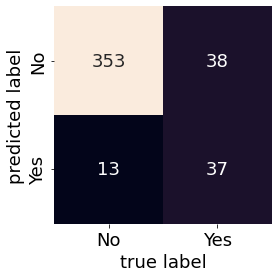

In [43]:
# Confusion Matrix 
# Imbalance dataset 

# Fitting Logistic Regression to the Training set
# Evaluate results

acc = accuracy_score(y_test, lr_test_pred )
prec = precision_score(y_test, lr_test_pred )
rec = recall_score(y_test, lr_test_pred )
f1 = f1_score(y_test, lr_test_pred )
f2 = fbeta_score(y_test, lr_test_pred, beta=2.0)


results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)


# Confusion Matrix Figure (0.5)
mat = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'])


plt.xlabel('true label')
plt.ylabel('predicted label')

Cross Validation

The average accuracy remains very close to the Logistic Regression model accuracy. The model generalizes well.

In [44]:
kfold = model_selection.KFold(n_splits=10)
modelCV =  LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.881


#### <a style="color:blue;">Random Forest</a>

AUC score 

In [45]:
model_roc_auc = roc_auc_score(y_test,rf_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,rf_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train,rf_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train,rf_train_prob[:,1])

Area under curve (test):  0.8098542805100183 

Area under curve (train):  1.0 



Confusion Matrix and Evaluation Metrics

           Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Random Forest   0.84127   0.692308    0.12  0.204545   0.14377


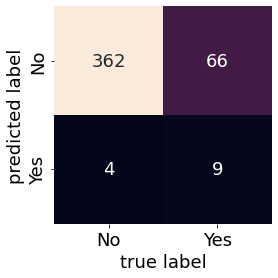

In [46]:
# Confusion Matrix
mat = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('D:/RF Confusion Matrix.png')

# Evaluate results
acc = accuracy_score(y_test, rf_test_pred )
prec = precision_score(y_test, rf_test_pred )
rec = recall_score(y_test, rf_test_pred )
f1 = f1_score(y_test, rf_test_pred )
f2 = fbeta_score(y_test, rf_test_pred, beta=2.0)


results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

Cross Validation
- The average accuracy remains close to the Random Forest model accuracy. The model generalizes well.

In [47]:
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.862


#### <a style="color:blue;">Decision Tree</a>

AUC score

In [48]:
model_roc_auc = roc_auc_score(y_test,dt_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,dt_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train,dt_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train,dt_train_prob[:,1])

Area under curve (test):  0.592896174863388 

Area under curve (train):  1.0 



           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Decision Tree  0.764172   0.316456  0.333333  0.324675  0.329815


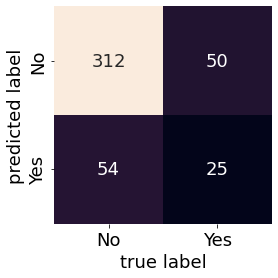

In [49]:
# Confusion Matrix
mat = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('D:/RF Confusion Matrix.png')

# Evaluate results
acc = accuracy_score(y_test, dt_test_pred )
prec = precision_score(y_test, dt_test_pred )
rec = recall_score(y_test, dt_test_pred )
f1 = f1_score(y_test, dt_test_pred )
f2 = fbeta_score(y_test, dt_test_pred, beta=2.0)


results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

Cross Validation
- The average accuracy do not close to the Decision Tree accuracy. The model do not generalizes well.

In [50]:
kfold = model_selection.KFold(n_splits=10)
modelCV = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.783


**Observation:**

- Based on the **AUC score**, it can observed that Logistic regression has a good score (>0.8) and the difference between train and test score is small compared to the other models. 
- Based on the **accuracy score**, it can observed that both Logistic regression and Random forest has a high accuracy score , which is 0.87.
- Based on the **recall and precision score**, Logistic regression has a better score compare to the other models.
- For cross validation, **K-fold** (10) is applied to measure how good the model fit. It can be observed that both Logistic regression and Random forest generalize well because the value are close to the model average accuracy. 

Thus, based on the justification, **Logistic regression** is selected to predict the employee churn as it has a better model performance. 

#### Feature Importance

#### <a style="color:blue;">Logistic Regression</a>

In [51]:
feature_importances = pd.concat([pd.DataFrame((X_train).columns, columns = ["features"]), pd.DataFrame(np.transpose(lr.fit(X_train, y_train).coef_), columns = ["coef"])],axis = 1)
feature_importances = feature_importances.sort_values("coef", ascending = False)
print(feature_importances.head(5))
print(feature_importances.tail(5))

                   features      coef
20           YearsAtCompany  1.081907
12                 OverTime  0.857100
22  YearsSinceLastPromotion  0.496244
11       NumCompaniesWorked  0.393909
39  JobRole_Human Resources  0.359222
                   features      coef
4   EnvironmentSatisfaction -0.489743
7                  JobLevel -0.515725
23     YearsWithCurrManager -0.606456
21       YearsInCurrentRole -0.675968
17        TotalWorkingYears -0.678966


#### <a style="color:blue;">Random Forest</a>

MonthlyIncome        0.077869
Age                  0.058810
TotalWorkingYears    0.056319
DailyRate            0.054355
OverTime             0.052428
HourlyRate           0.049464
MonthlyRate          0.046719
DistanceFromHome     0.041769
YearsAtCompany       0.037625
PercentSalaryHike    0.034363
dtype: float64


<AxesSubplot:>

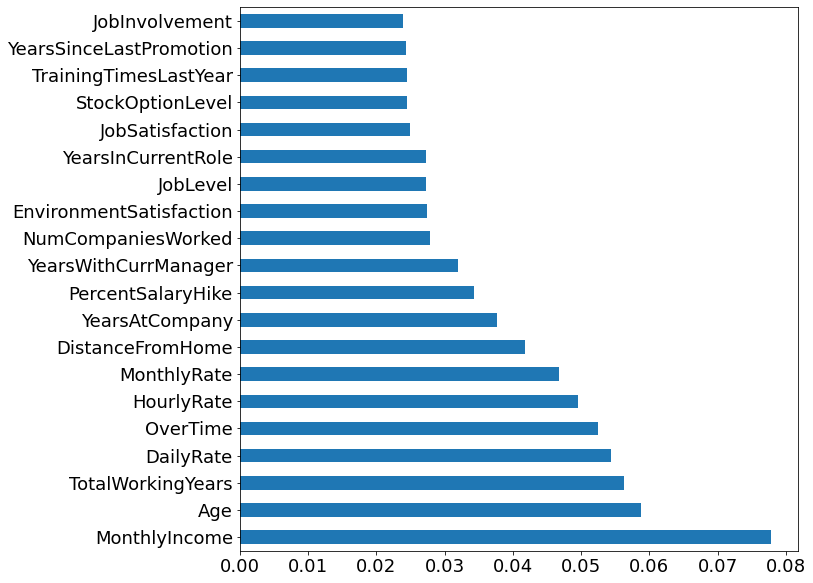

In [52]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).nlargest(10))

feature_importances = feature_importances.nlargest(20)
feature_importances.plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('D:/RF Features.png')

#### <a style="color:blue;">Decision Tree</a>

MonthlyIncome         0.093269
TotalWorkingYears     0.090216
DailyRate             0.086225
DistanceFromHome      0.069162
OverTime              0.050459
JobInvolvement        0.046686
JobLevel              0.043979
Age                   0.043679
StockOptionLevel      0.041594
YearsInCurrentRole    0.040977
dtype: float64


<AxesSubplot:>

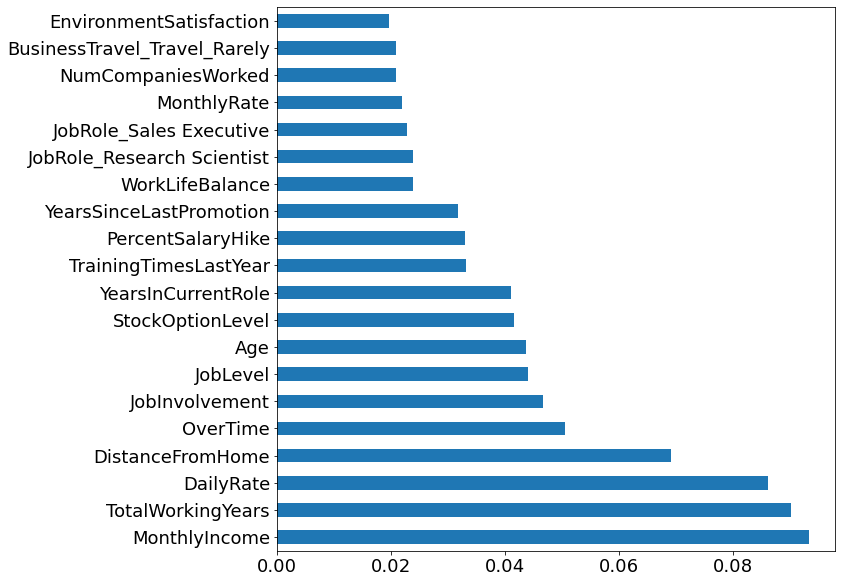

In [53]:
feature_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).nlargest(10))

feature_importances = feature_importances.nlargest(20)
feature_importances.plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('D:/RF Features.png')

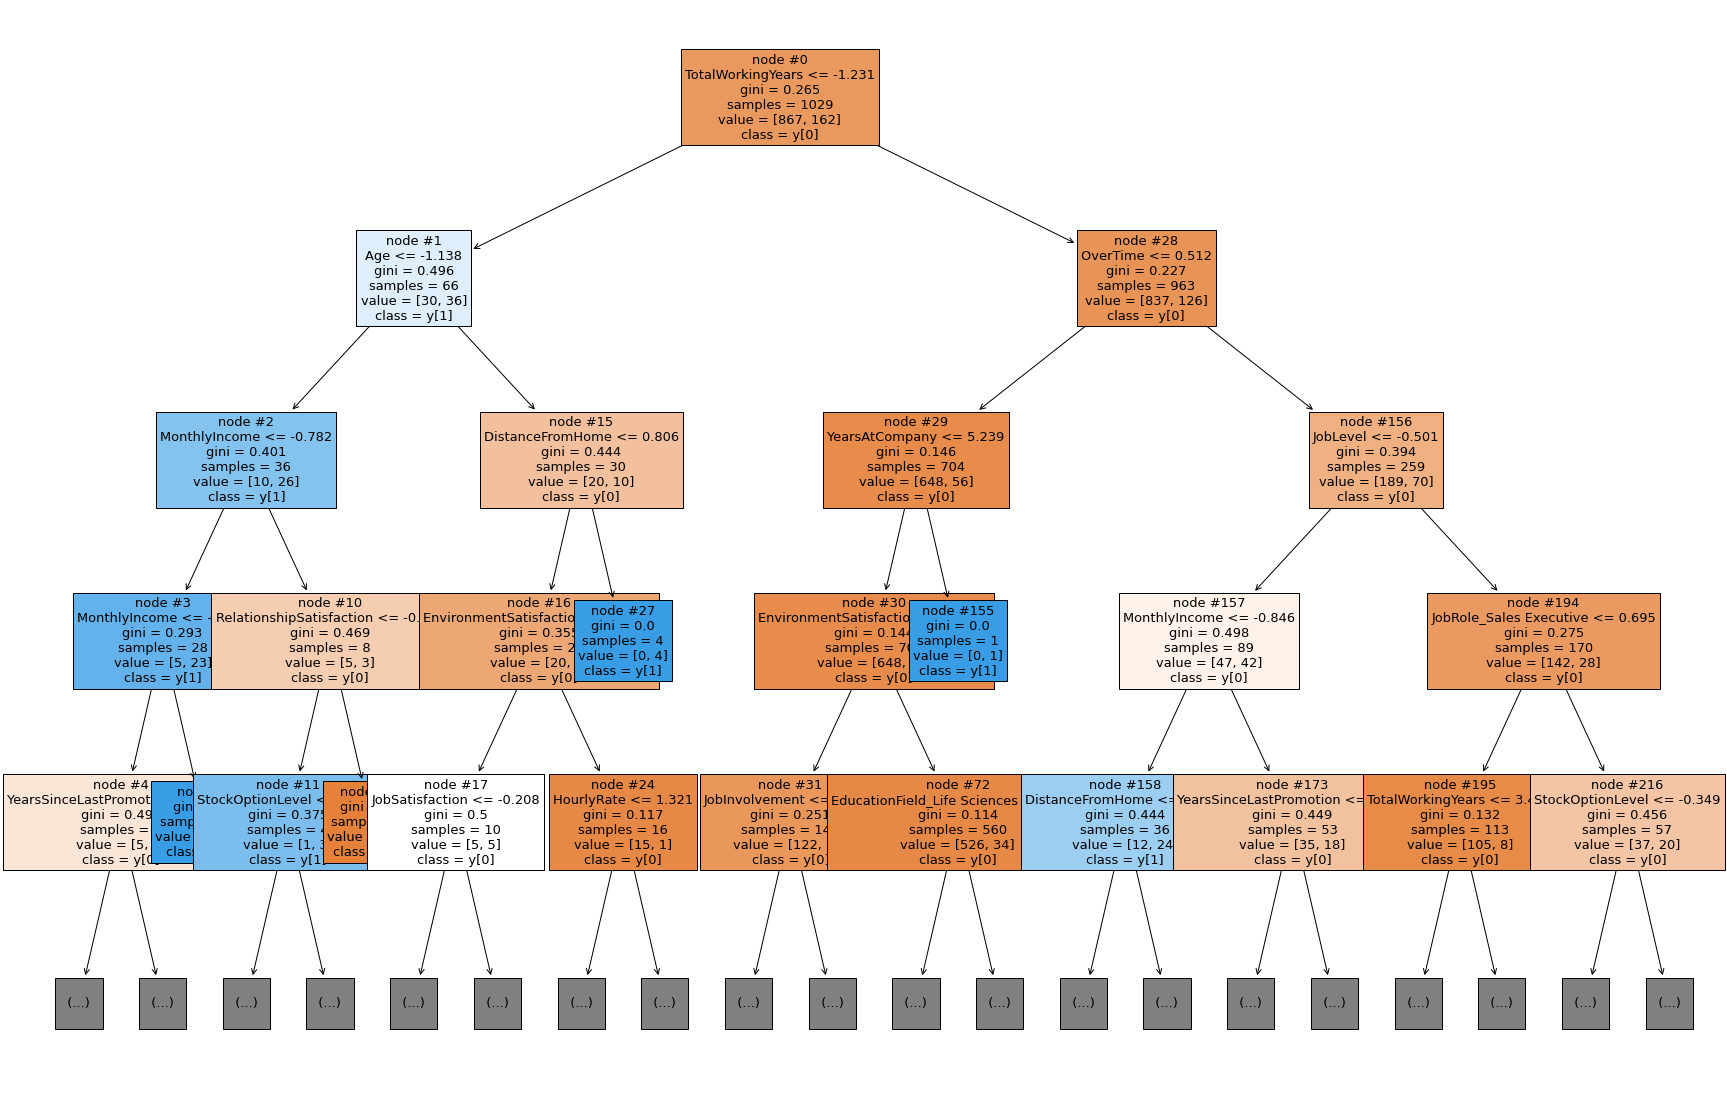

In [54]:
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=13,node_ids=True,class_names=True)
plt.show()

**Note:** Blue leaves represent the eligible class which is **y[1]** and the orange leaves represent the non-eligible class which is **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

- Employees who **stay at company longer time**, doing overtime with low salaries and less job involvement have a chance of leaving the company, as they might feel overworked and underpaid and might be looking for better opportunities.
- Employees who **stay at company shorter time** with a young age, low stock option level and low education level have a high chance of attriting. 

**Observation:**

- As Logistic Regression model is selected, the feature importance of the model will be interpreted. 
- The Top 10 significant variables: overtime, years at company, years since last promotion, number of companies worked, job role, job satisfaction, job involvement, environment satisfaction, years in current role, years with current manager
- Interpretation: 

    i. All the significant variables are affecting the employee to churn. 
    
    ii. Employee will churn because they don't have work life balance (**over time**)
    
    iii. Employee will churn if they are not promoted after a few years (**years since last promotion**) 
    
    iv. If the employee is not satisfied with the job (**job satisfaction**) and environment (**environment satisfaction**), he or she will decided to resign. 
    
    v. If the employees' duration with the company (**years at company**) and current role (**years in current role**)is short, the number of companies worked (**number of companies worked**) tends to be higher, the employee are most probably will churn. 



---

## Conclusion

- Objective 1 is achieved. The relationship between factors and employee churn are identified. 
- Objective 2 is achieved. The significant factors that causes employee churn are determined. 
- Objective 3 is acheived. Churners' characteristics and probability to churn can be predicted by using Logistic Regression model. 


---

## Future Work

#### Working Mode
- The COVID-19 pandemic made working from home (WFH) the new way of working.
- More companies are offering permanent remote and hybrid work. 
- Working mode might become a significant factor of employee churn and leads to the next great distruption. 
- Article:  [Companies offering remote and hybrid work](https://www.cnbc.com/2022/04/13/10-companies-that-switched-to-permanent-hybrid-or-remote-work-and-hiring-right-now.html)

#### Employee Benefits 
- Different companies have different benefits packages. A good benefits package can make employees feel rewarded and appreciated for their work. 
- Nowadays, a good pay is not sufficient to retain a good and talented employee. 
- Benefits might become a significant factor of employee churn.
- Article: [Employers can reduce turnover with the right mix of benefits](https://www.501c.com/employers-can-reduce-turnover-with-the-right-mix-of-benefits/#:~:text=A%20new%20report%20finds%20that,a%20138%25%20decrease%20in%20turnover)

---

## Reference 

- Department of Statistics Malaysia. (2022). Retrieved from Key Statistics of Labour Force in Malaysia 2022: https://www.dosm.gov.my/v1/index.php?r=column/pdfPrev&id=UEpPd3dKQkM2ZVRnVFZ3T0w1d1Zrdz09
- Alhashmi, S. M. (2019). Towards Understanding Employee Attrition using a Decision Tree Approach. Proceeding of 2019 International Conference on Digitization: Landscaping Artificial Intelligence, ICD 2019, 44–47. https://doi.org/10.1109/ICD47981.2019.9105767
- Bandyopadhyay, N., & Jadhav, A. (2021). Churn Prediction of Employees Using Machine Learning Techniques. Tehnički Glasnik, 15(1), 51–59. https://doi.org/10.31803/tg-20210204181812
- El-Rayes, N., Fang, M., Smith, M., & Taylor, S. M. (2020). Predicting employee attrition using tree-based models. International Journal of Organizational Analysis, 28(6), 1273–1291. https://doi.org/10.1108/IJOA-10-2019-1903
- Fallucchi, F., Coladangelo, M., Giuliano, R., & De Luca, E. W. (2020). Predicting employee attrition using machine learning techniques. Computers, 9(4), 1–17. https://doi.org/10.3390/computers9040086
- Habous, A., Nfaoui, E. H., & Oubenaalla, Y. (2021). Predicting Employee Attrition using Supervised Learning Classification Models. 5th International Conference on Intelligent Computing in Data Sciences, ICDS 2021, 0–4. https://doi.org/10.1109/ICDS53782.2021.9626761
- Jain, P. K., Jain, M., & Pamula, R. (2020). Explaining and predicting employees’ attrition: a machine learning approach. SN Applied Sciences, 2(4), 1–11. https://doi.org/10.1007/s42452-020-2519-4
- Pratt, M., Boudhane, M., & Cakula, S. (2021). Employee attrition estimation using random forest algorithm. Baltic Journal of Modern Computing, 9(1), 49–66. https://doi.org/10.22364/BJMC.2021.9.1.04
- Sadana, P., & Munnuru, D. (2022). Machine Learning Model to Predict Work Force Attrition. Lecture Notes in Networks and Systems, 237, 361–376. https://doi.org/10.1007/978-981-16-6407-6_33
- Srivastava, P. R., & Eachempati, P. (2021). Intelligent Employee Retention System for Attrition Rate Analysis and Churn Prediction: An Ensemble Machine Learning and Multi- Criteria Decision-Making Approach. Journal of Global Information Management, 29(6), 1–29. https://doi.org/10.4018/JGIM.20211101.oa23
- Yahia, N. Ben, Hlel, J., & Colomo-Palacios, R. (2021). From Big Data to Deep Data to Support People Analytics for Employee Attrition Prediction. IEEE Access, 9, 60447–60458. https://doi.org/10.1109/ACCESS.2021.3074559

---